## ML Project - Coded

## Problem Statement

### Context:

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

### Objective:
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

### Data Description

* vote: Party choice: Conservative or Labour
* age: in years
* economic.cond.national: Assessment of current national economic conditions, 1 to 5.
* economic.cond.household: Assessment of current household economic conditions, 1 to 5.
* Blair: Assessment of the Labour leader, 1 to 5.
* Hague: Assessment of the Conservative leader, 1 to 5.
* Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
* political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
gender: female or male.


In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing necessary libraries

## Importing Dataset

In [2]:
df=pd.read_excel('/Users/ishashukla/Downloads/Election_Data.xlsx',sheet_name=1)

In [3]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset¶

In [4]:
data.head() ## the code to view top 5 rows of the data

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
data.tail() ## the code to view last 5 rows of the data

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [6]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


### Understand the shape of the dataset

In [8]:
data.shape ##  the code to view dimensions of the data

(1525, 9)

### Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

8

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


### Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [13]:
data.describe(include='object').T ##  Complete the code to print the statistical summary of the data

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [15]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
skewness = numerical_data.skew()
skewness

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

#### Let's check the count of each unique category in each of the categorical variables

In [16]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

vote
Labour          1057
Conservative     460
Name: count, dtype: int64
--------------------------------------------------
gender
female    808
male      709
Name: count, dtype: int64
--------------------------------------------------


### Univariate Analysis

In [17]:
data["age"].describe()

count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

In [18]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observation on economic.cond.national

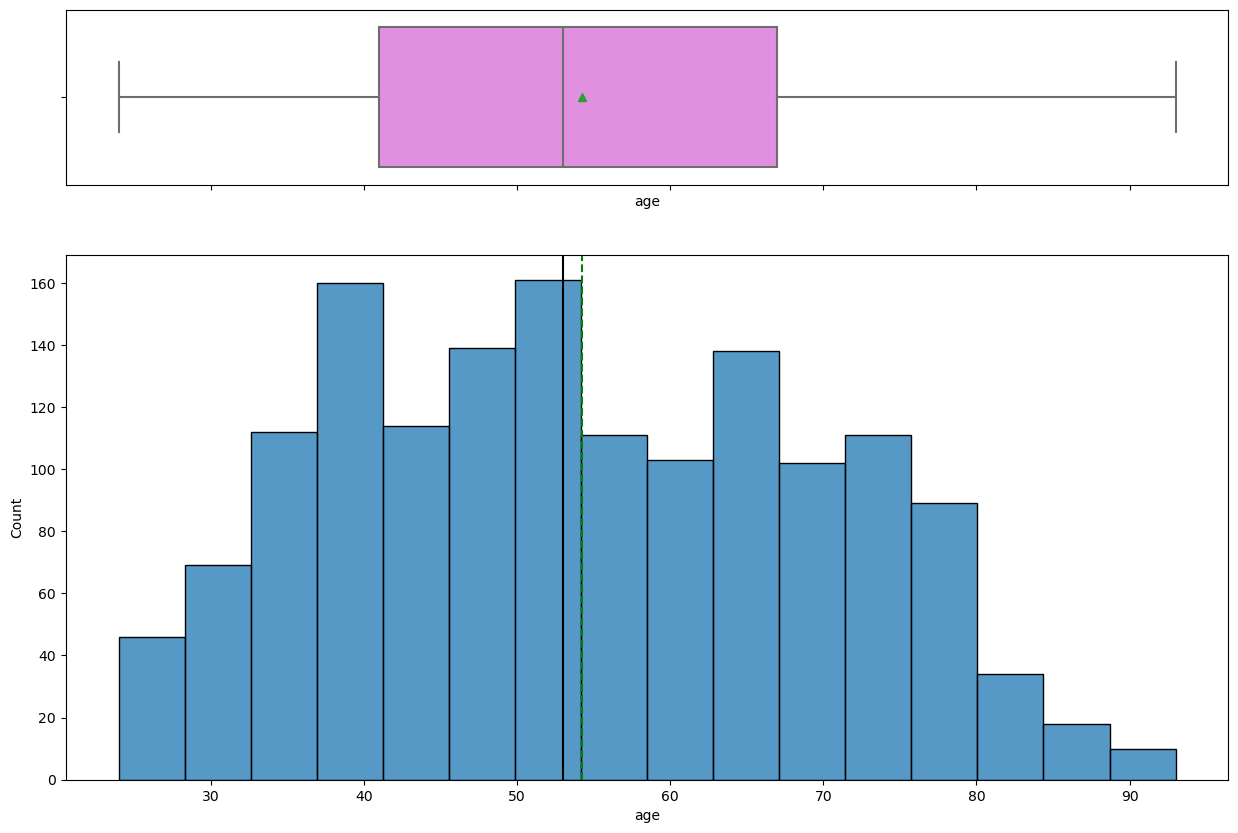

In [19]:
histogram_boxplot(data, "age")

In [20]:
data["economic.cond.national"].describe()

count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

economic.cond.national
3    604
4    538
2    256
5     82
1     37
Name: count, dtype: int64


<Axes: xlabel='economic.cond.national', ylabel='count'>

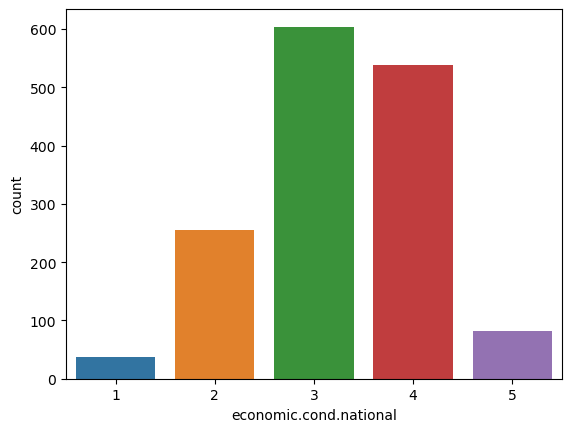

In [21]:
print(data["economic.cond.national"].value_counts())
sns.countplot(data=data,x='economic.cond.national')

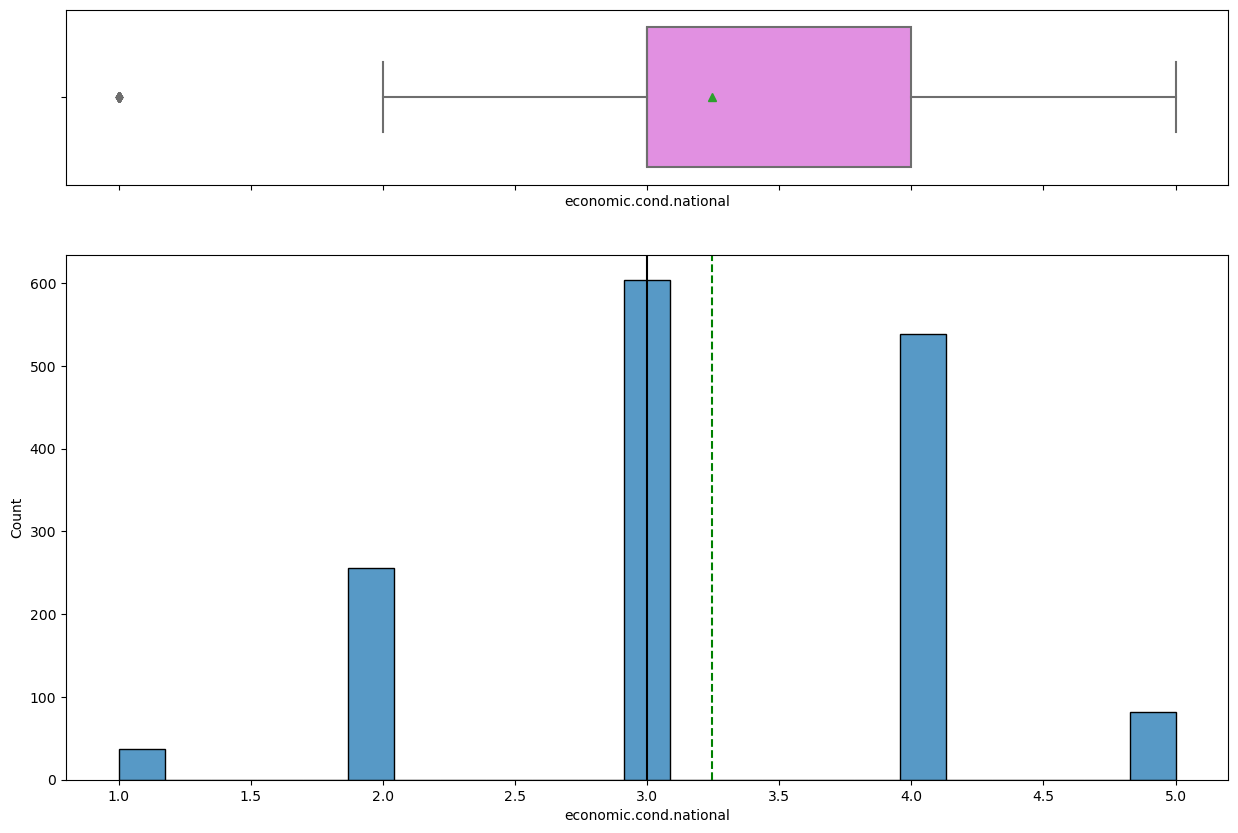

In [22]:
histogram_boxplot(data, "economic.cond.national")

#### Observation on economic.cond.household

In [23]:
print("Average = ",data["economic.cond.household"].mean())
print(data["economic.cond.household"].value_counts())

Average =  3.1377719182597232
economic.cond.household
3    645
4    435
2    280
5     92
1     65
Name: count, dtype: int64


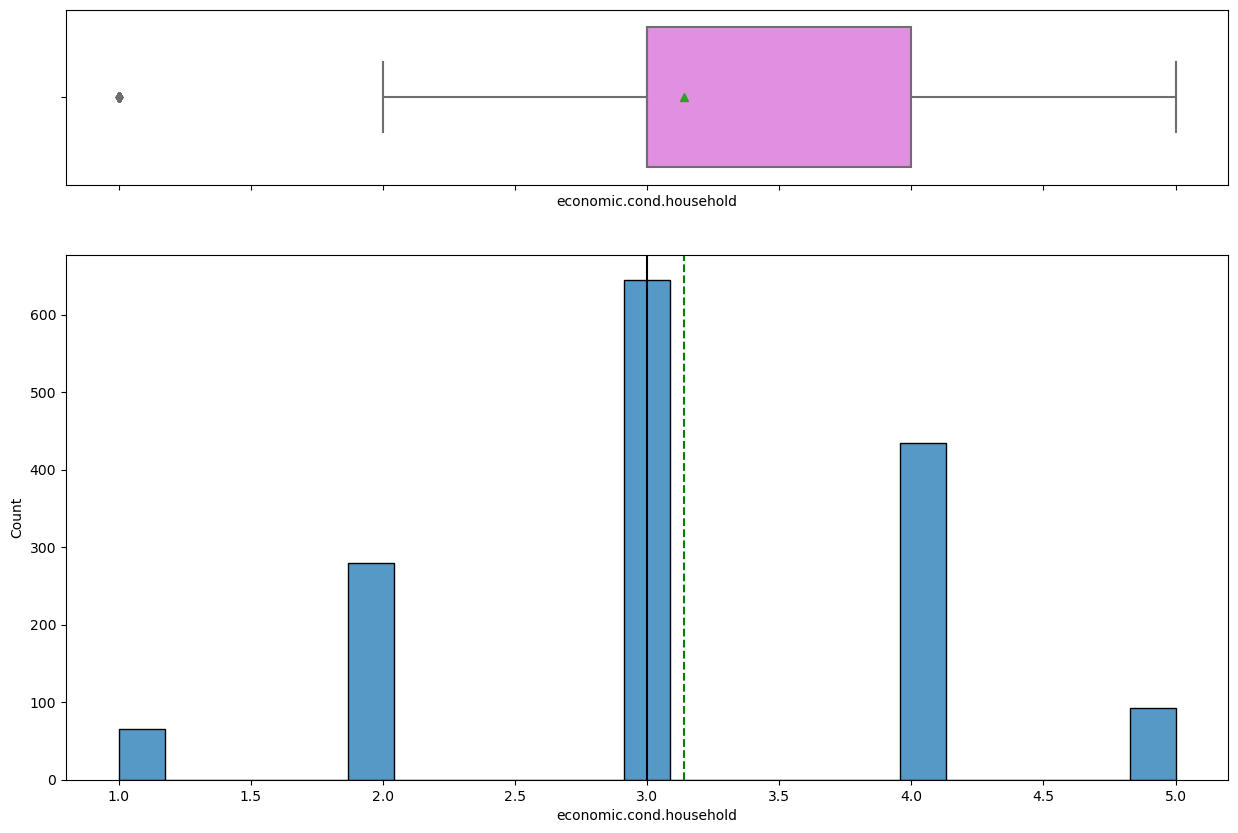

In [24]:
histogram_boxplot(data, "economic.cond.household")

#### Observation on Blair

Average =  3.3355306526038233
Blair
4    833
2    434
5    152
1     97
3      1
Name: count, dtype: int64


<Axes: xlabel='Blair', ylabel='count'>

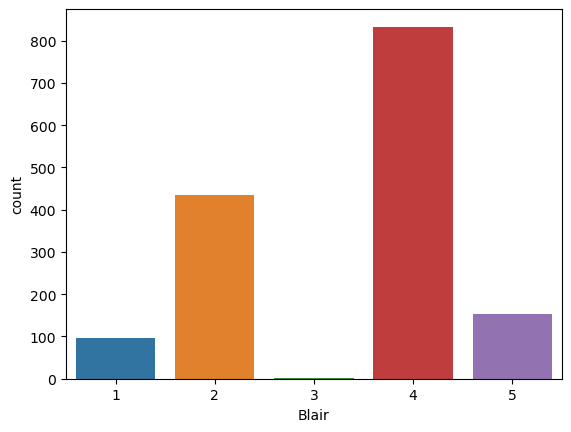

In [25]:
print("Average = ",data["Blair"].mean())
print(data["Blair"].value_counts())
sns.countplot(data=data,x='Blair')

### Observation on Hague

Average =  2.7495056031641396
Hague
2    617
4    557
1    233
5     73
3     37
Name: count, dtype: int64


<Axes: xlabel='Hague', ylabel='count'>

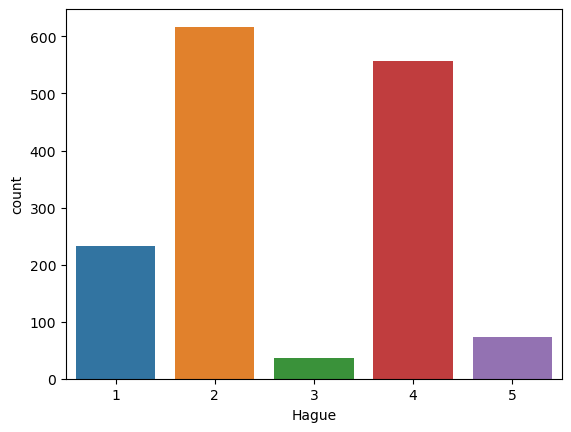

In [26]:
print("Average = ",data["Hague"].mean())
print(data["Hague"].value_counts())
sns.countplot(data=data,x='Hague')

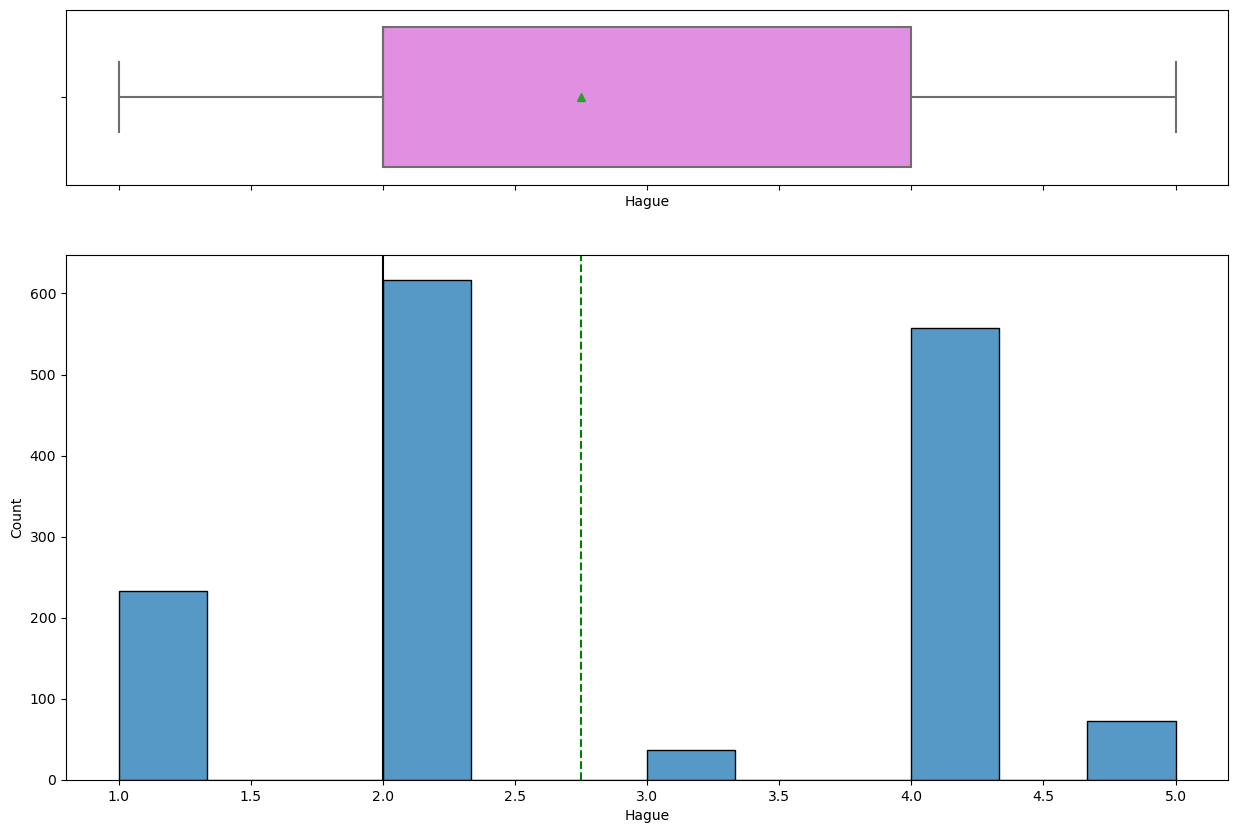

In [27]:
histogram_boxplot(data, "Hague")

### Observation on Europe

Average =  6.7402768622280815
Europe
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: count, dtype: int64


<Axes: xlabel='Europe', ylabel='count'>

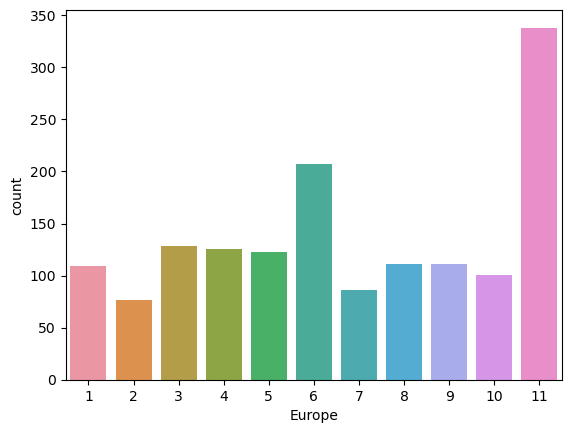

In [28]:
print("Average = ",data["Europe"].mean())
print(data["Europe"].value_counts())
sns.countplot(data=data,x='Europe')

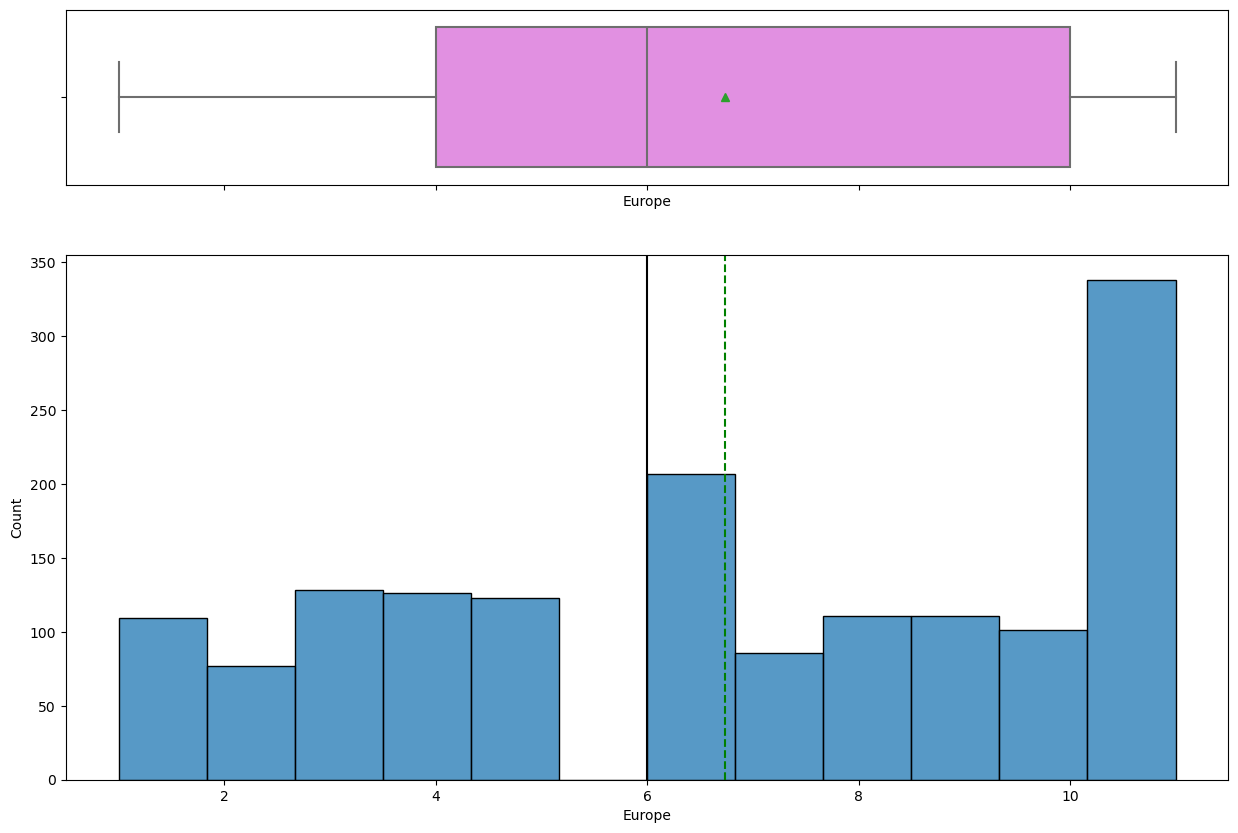

In [29]:
histogram_boxplot(data, "Europe")

### Observation on political.knowledge

Average =  1.5405405405405406
political.knowledge
2    776
0    454
3    249
1     38
Name: count, dtype: int64


<Axes: xlabel='political.knowledge', ylabel='count'>

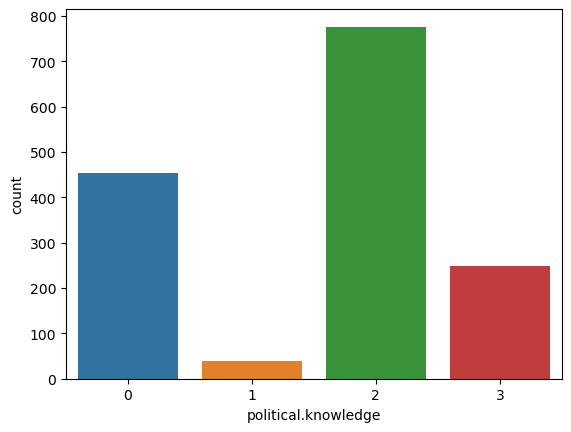

In [30]:
print("Average = ",data["political.knowledge"].mean())
print(data["political.knowledge"].value_counts())
sns.countplot(data=data,x='political.knowledge')

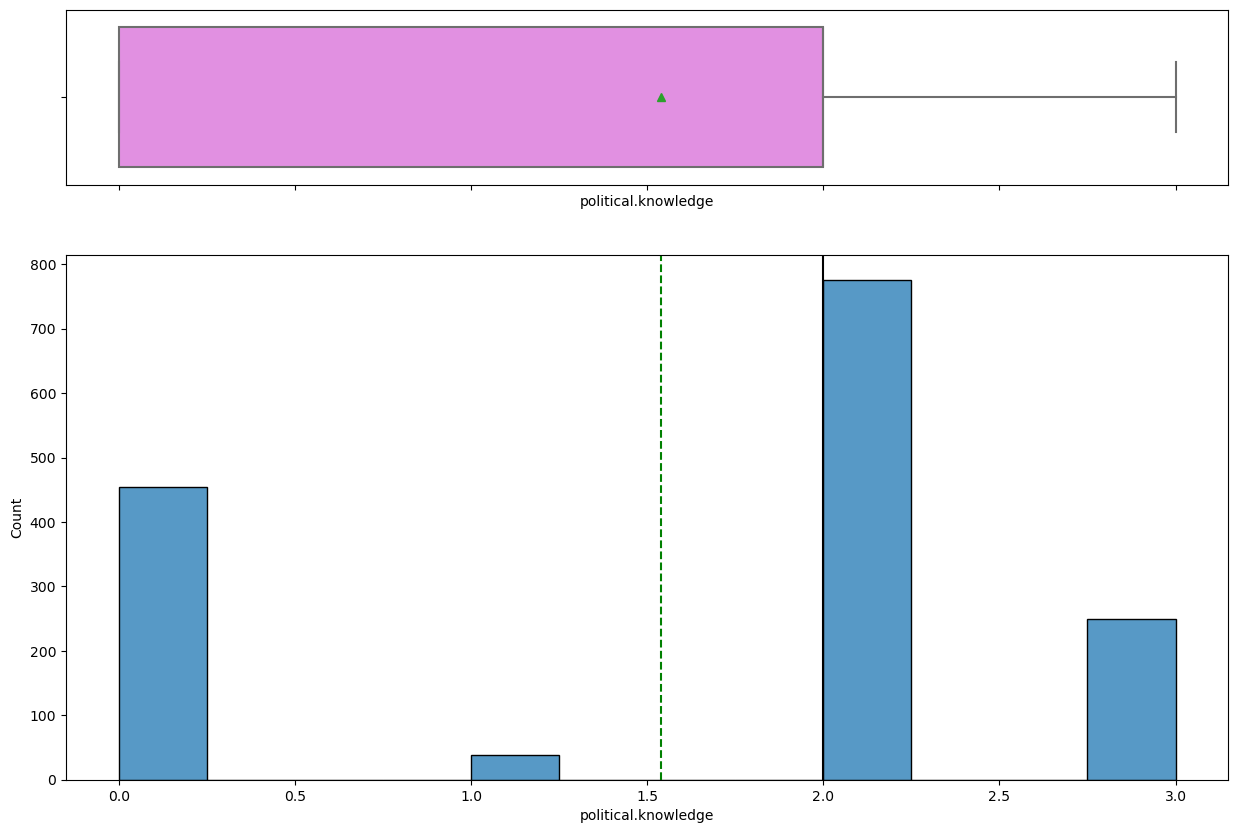

In [31]:
histogram_boxplot(data, "political.knowledge")

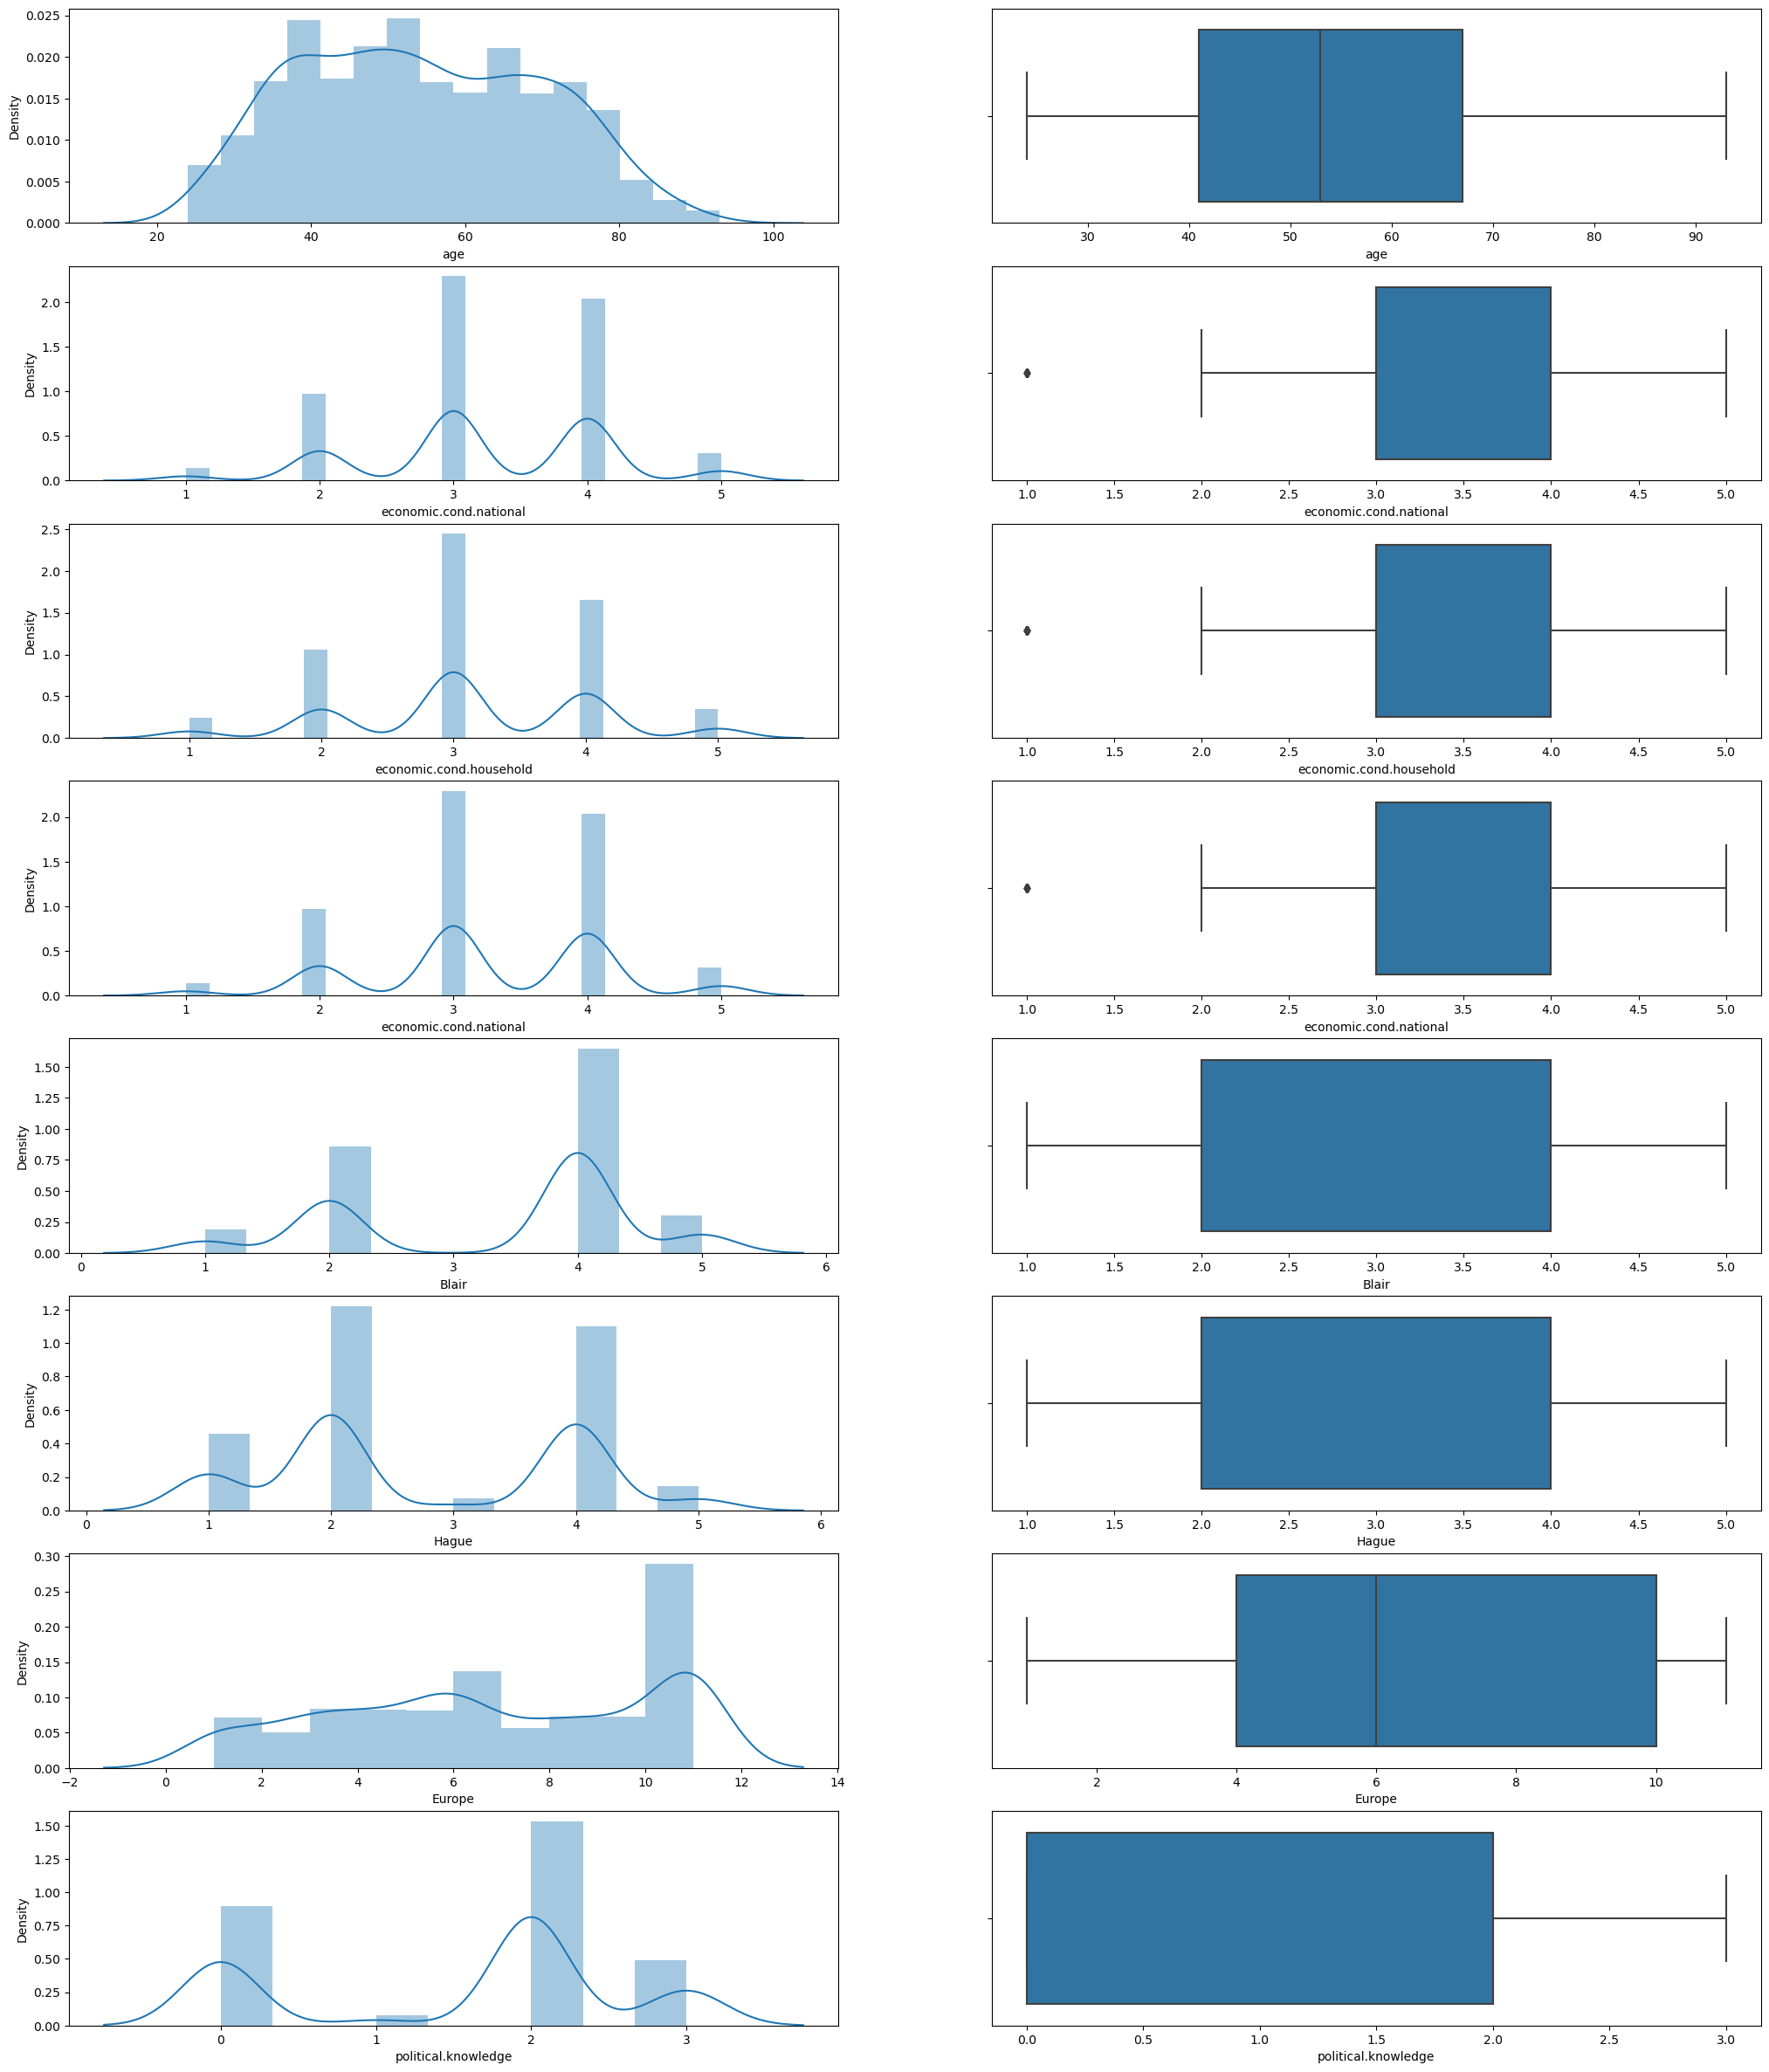

In [32]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(25, 30)
sns.distplot(data['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=data, ax=axes[0][1])
sns.distplot(data['economic.cond.national'], kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=data, ax=axes[1][1])
sns.distplot(data['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=data, ax=axes[2][1])
sns.distplot(data['economic.cond.national'], kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=data, ax=axes[3][1])
sns.distplot(data['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=data, ax=axes[4][1])
sns.distplot(data['Hague'], kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=data, ax=axes[5][1])
sns.distplot(data['Europe'], kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=data, ax=axes[6][1])
sns.distplot(data['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=data, ax=axes[7][1])

plt.show()


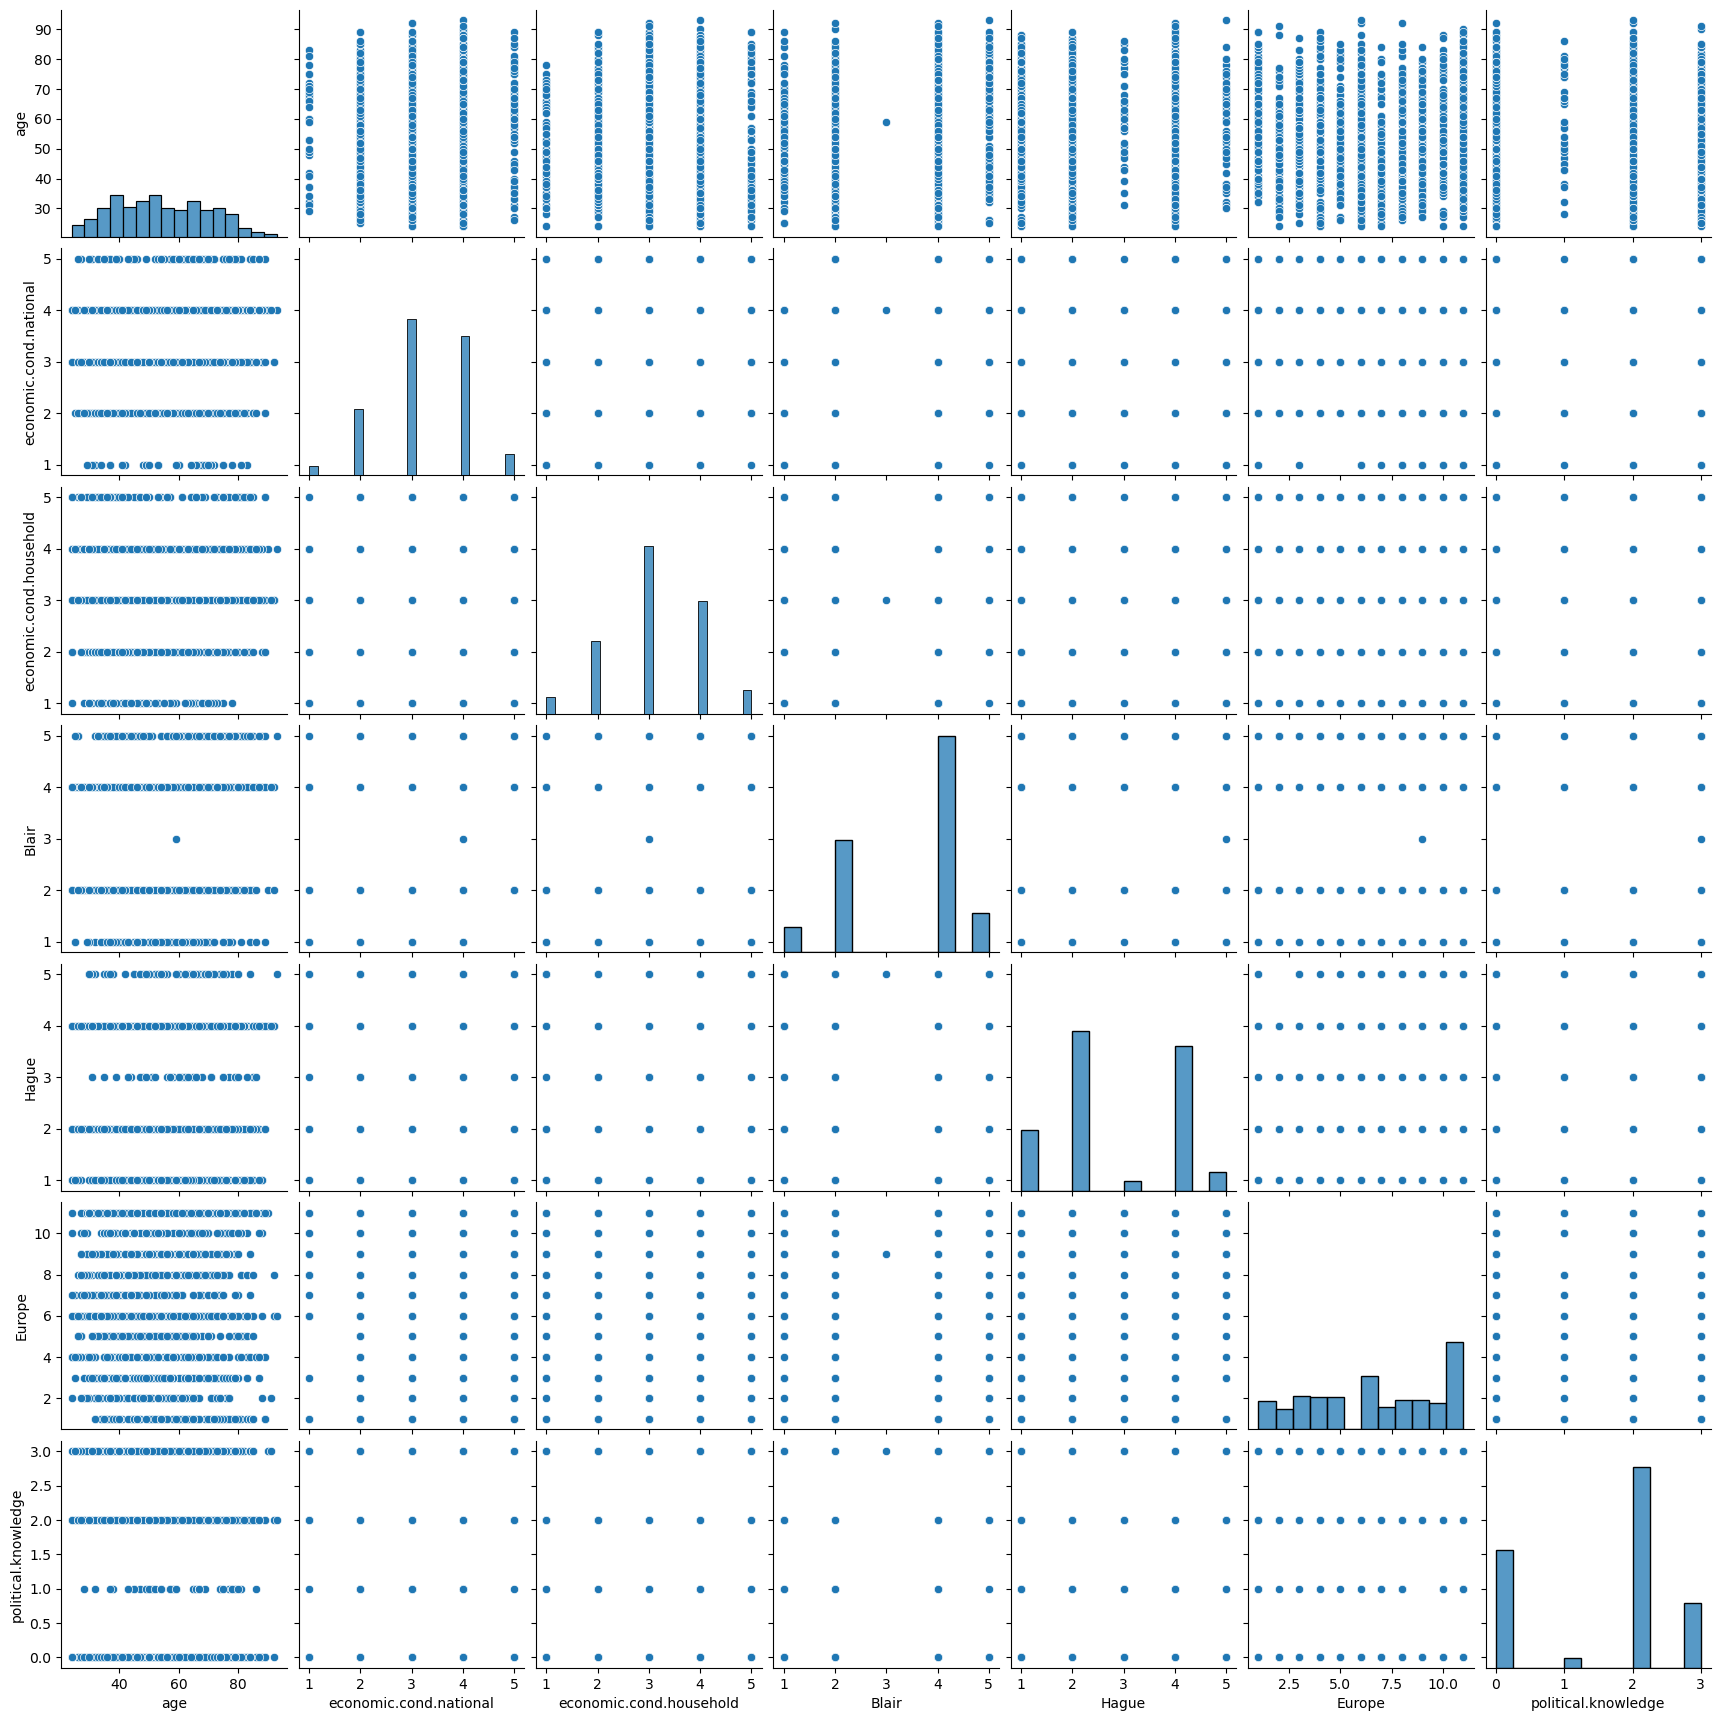

In [33]:
sns.pairplot(data)

<Axes: xlabel='Hague', ylabel='age'>

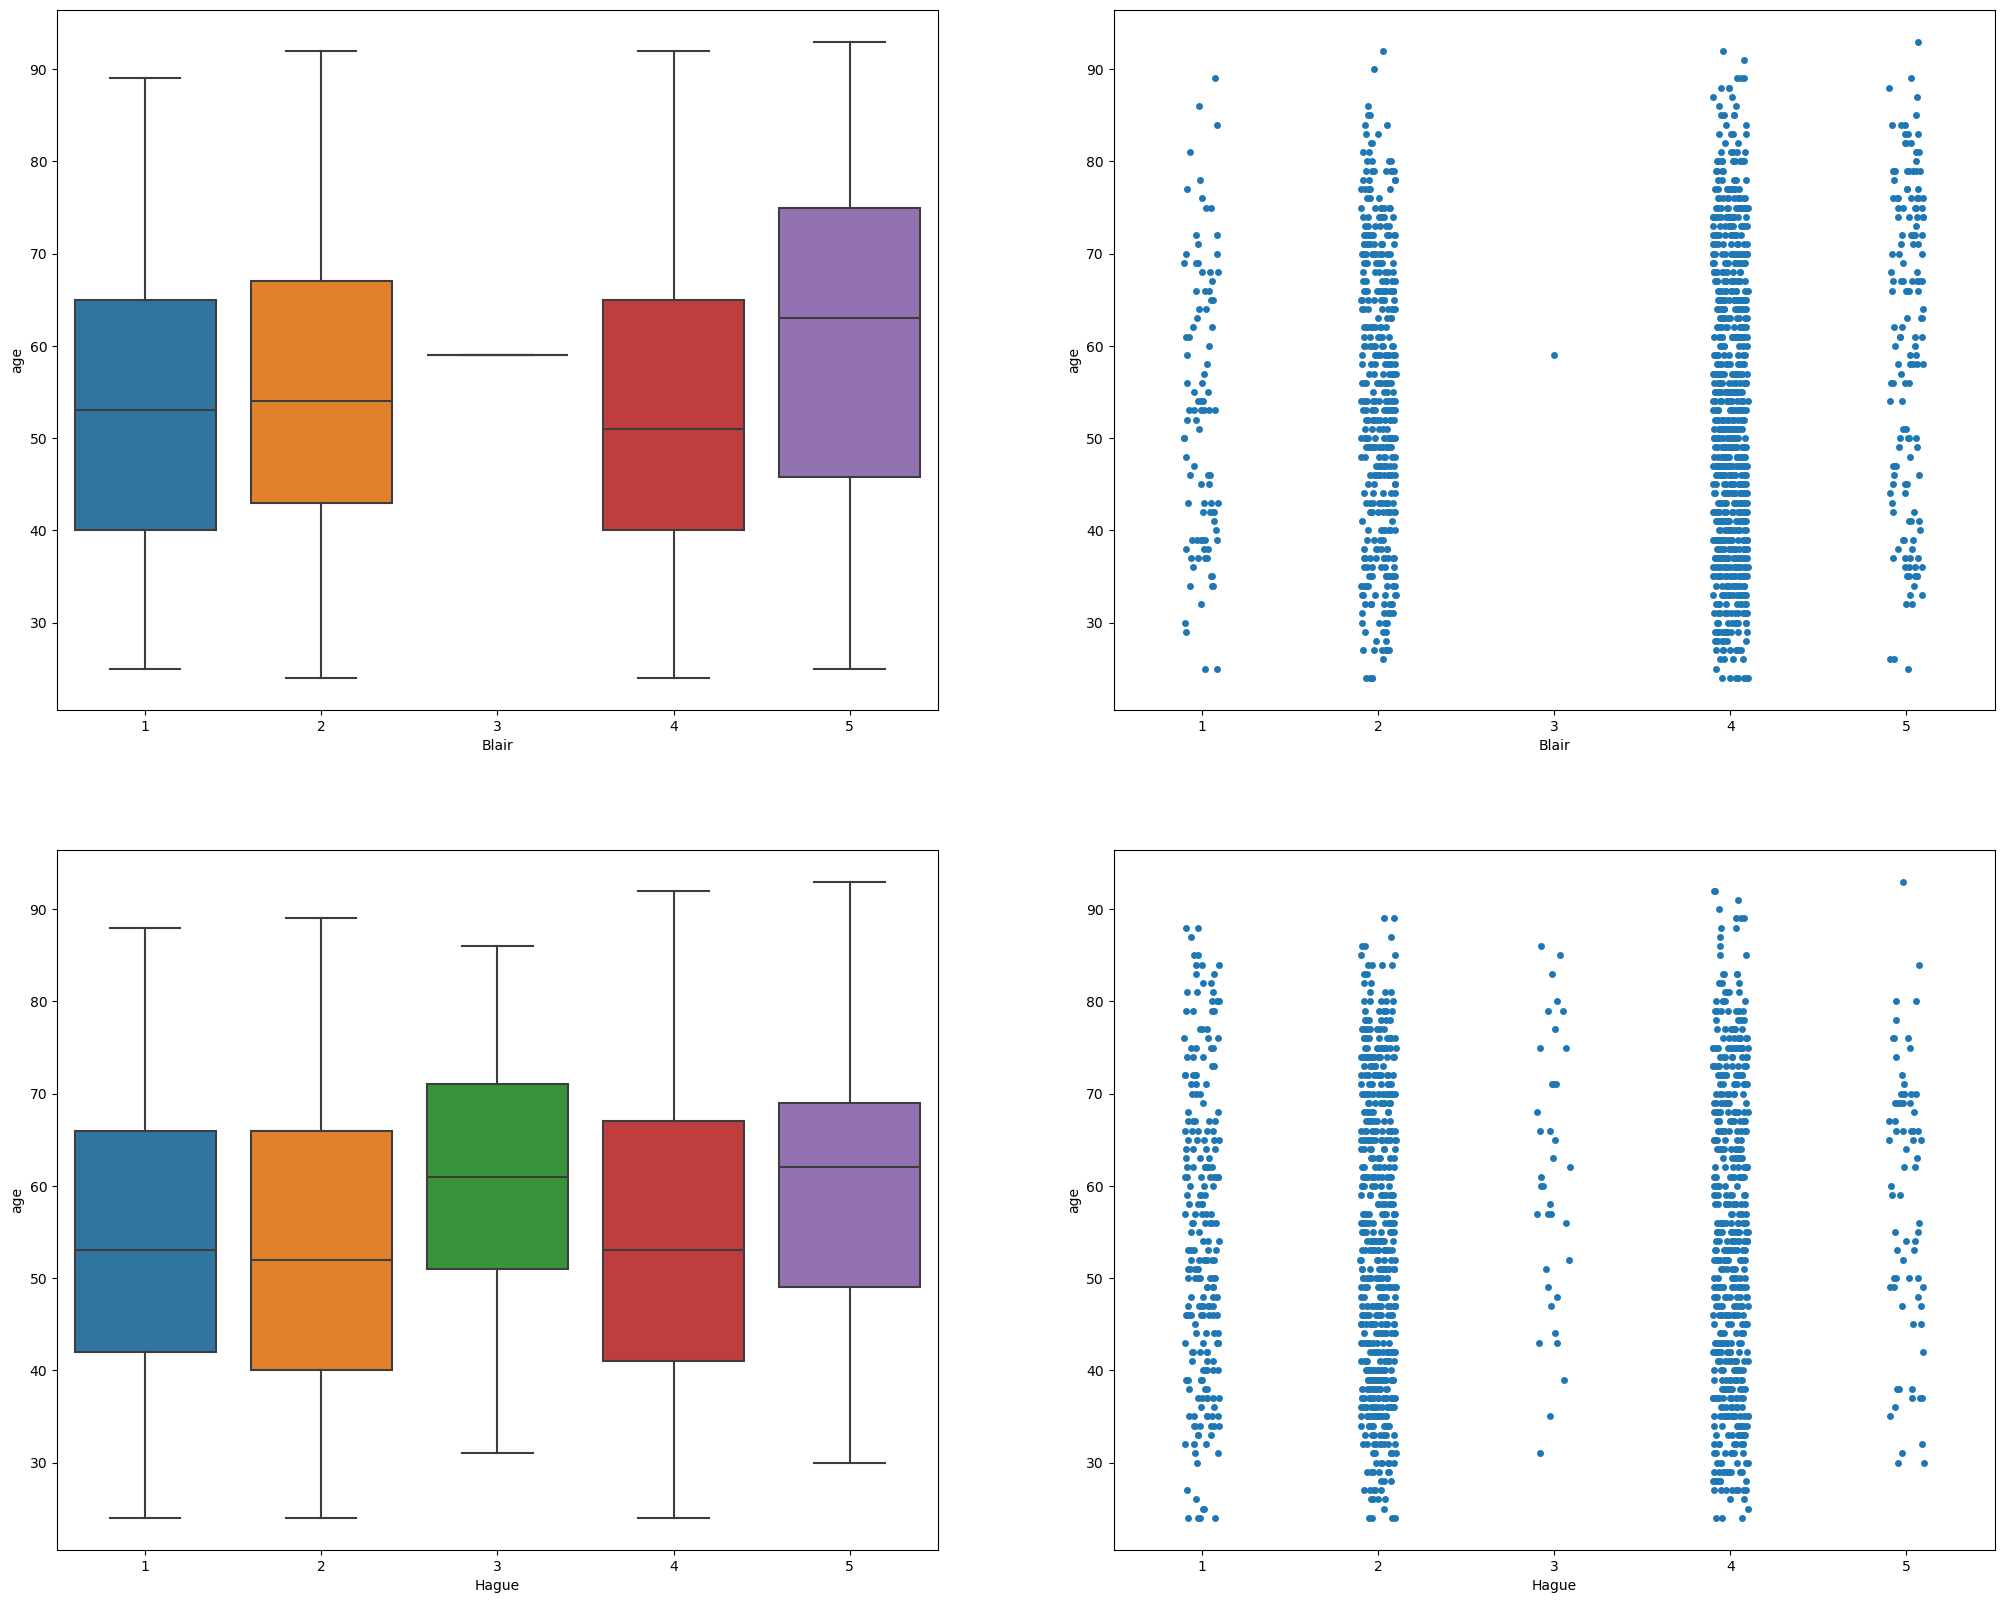

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(25, 20)

sns.boxplot(x=data["Blair"], y=data["age"], ax=axes[0][0])
sns.stripplot(x=data["Blair"], y=data["age"], ax=axes[0][1])
sns.boxplot(x=data["Hague"], y=data["age"], ax=axes[1][0])
sns.stripplot(x=data["Hague"], y=data["age"], ax=axes[1][1])

In [35]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

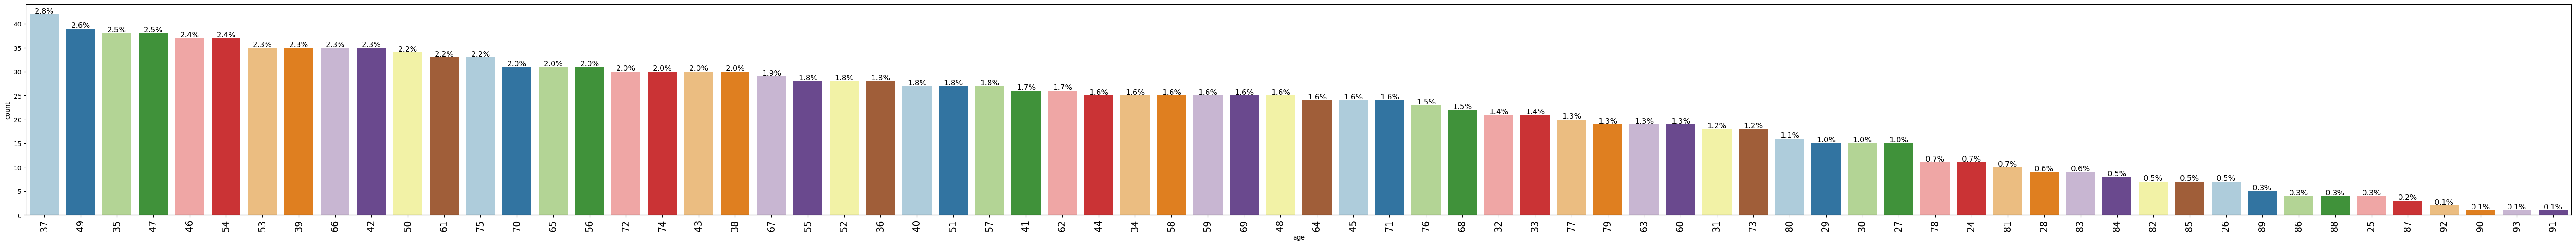

In [36]:
labeled_barplot(data, "age", perc=True)

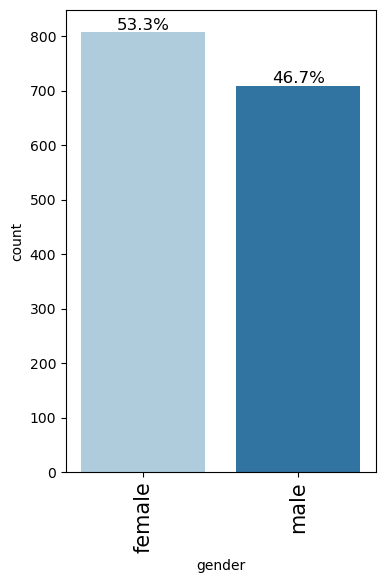

In [37]:
labeled_barplot(data, "gender", perc=True)

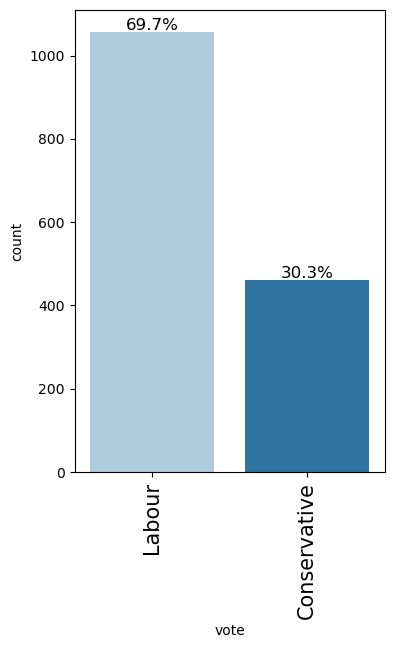

In [38]:
labeled_barplot(data, "vote", perc=True)

### Bivariate Analysis

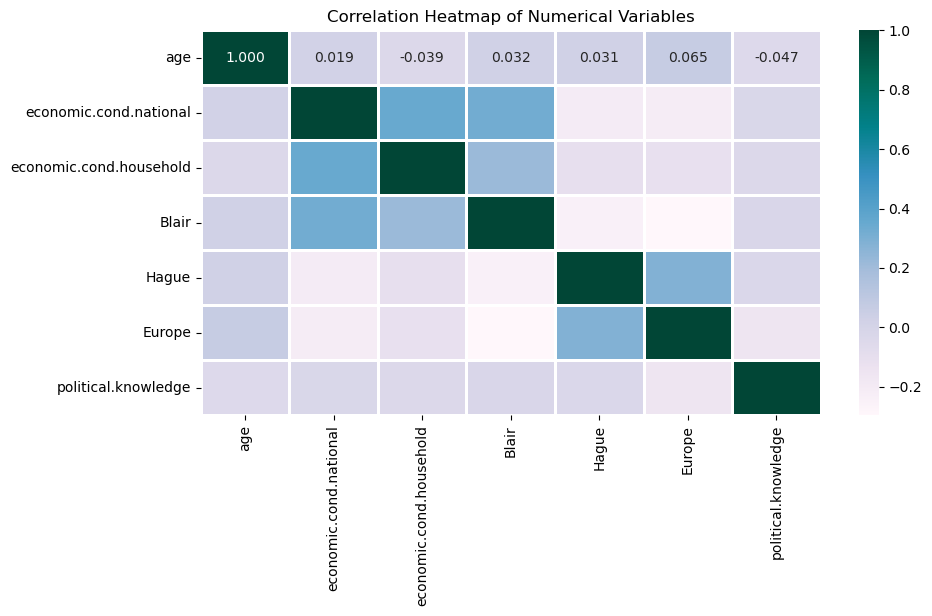

In [39]:
# Select numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Create heatmap to visualize correlation between variables
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True,fmt=".3f" ,linewidth=1, cmap="PuBuGn"
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [40]:
data[cols_list].corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


In [41]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

vote    Conservative  Labour   All
gender                            
All              460    1057  1517
female           257     551   808
male             203     506   709
------------------------------------------------------------------------------------------------------------------------


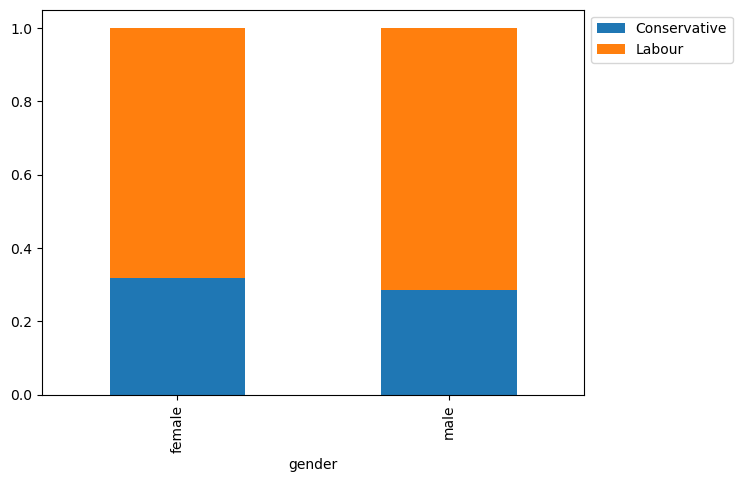

In [42]:
stacked_barplot(data,'gender','vote') 
##  the code to plot stacked barplot 

In [43]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

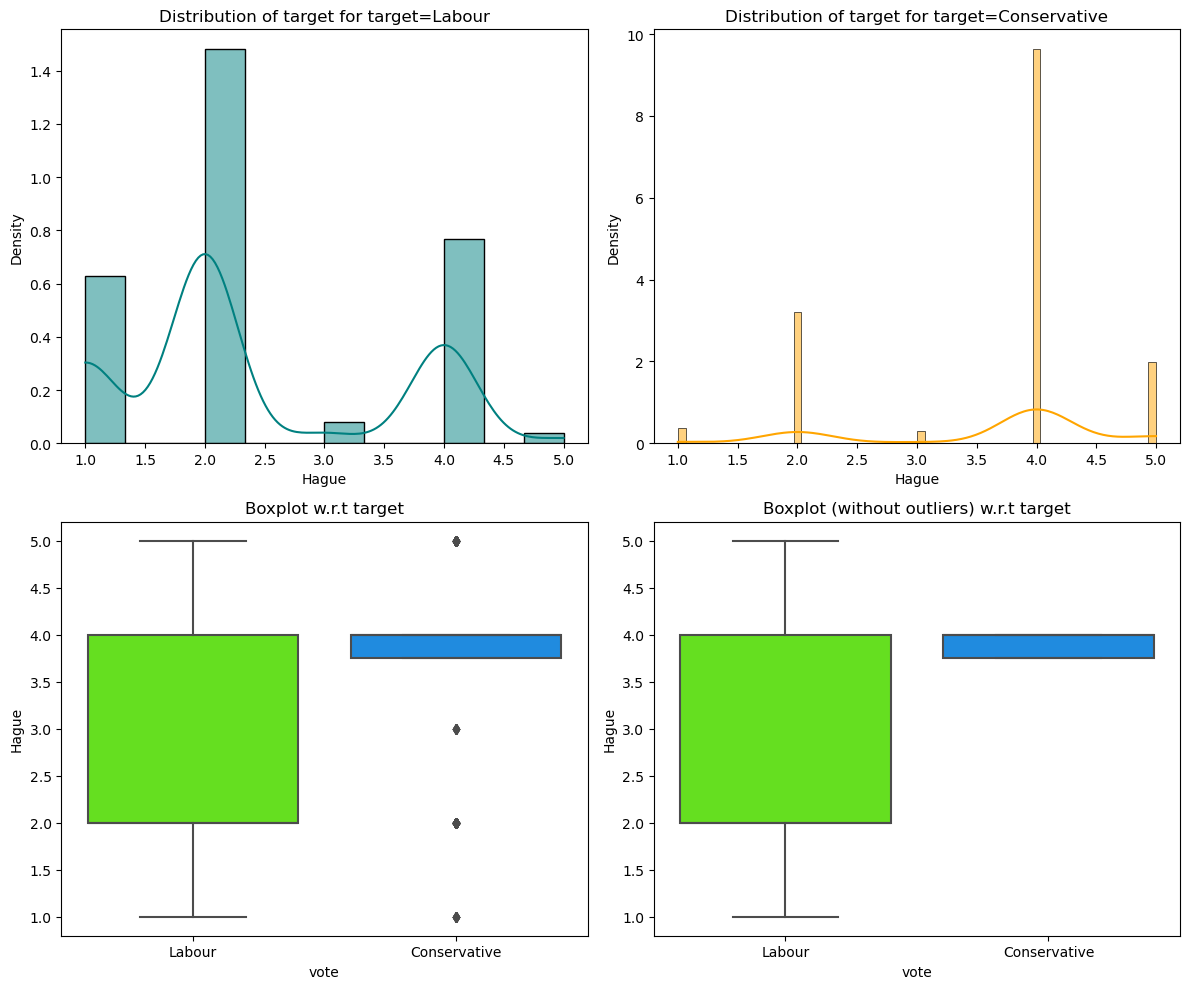

In [44]:
distribution_plot_wrt_target(data,'Hague','vote') 

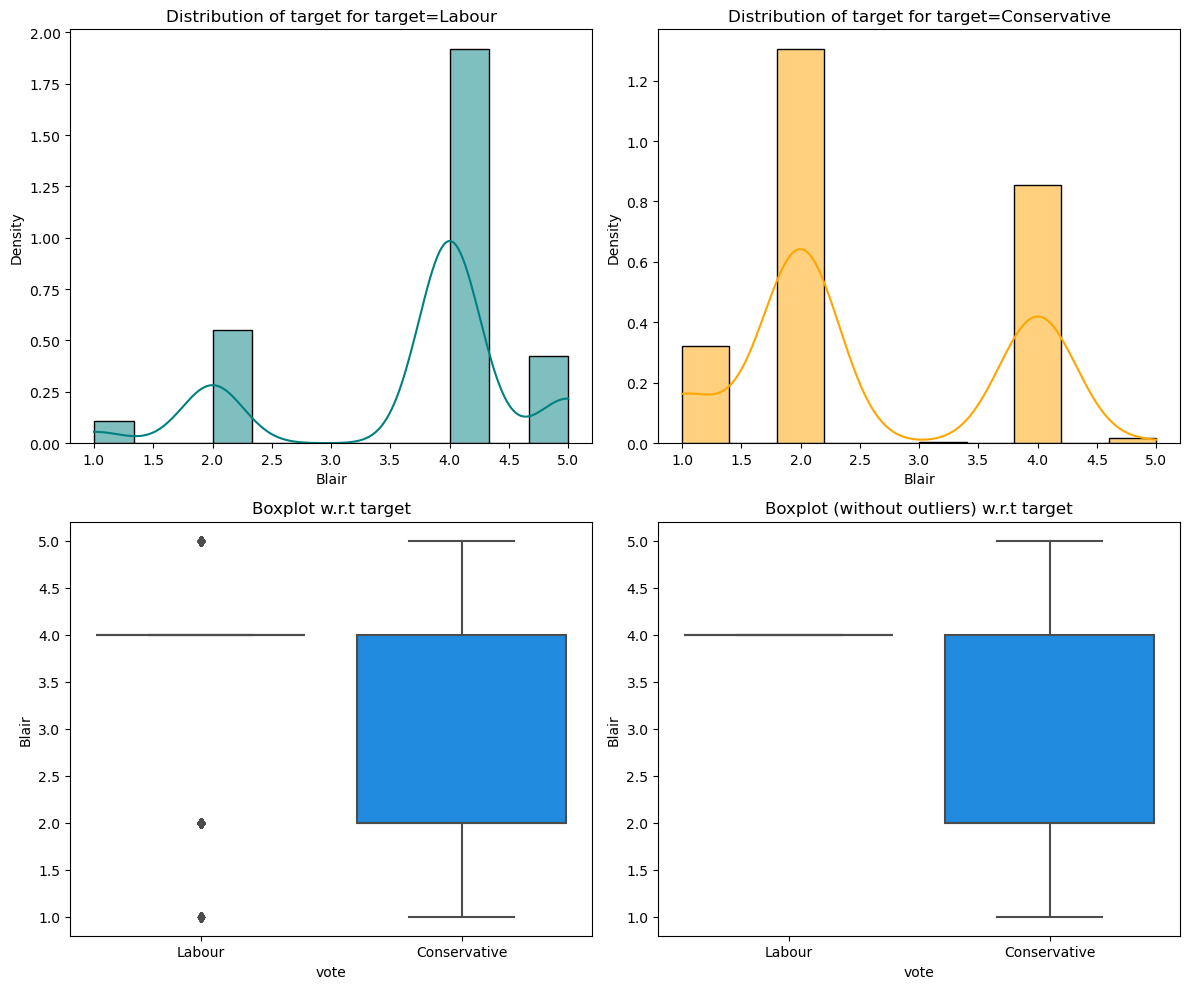

In [45]:
distribution_plot_wrt_target(data,'Blair','vote') 

<Axes: xlabel='Hague', ylabel='Count'>

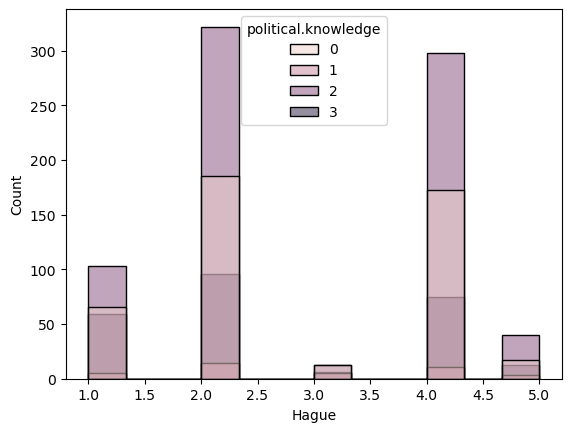

In [46]:
sns.histplot(data =data , x = "Hague", hue = "political.knowledge")

## Data Preprocessing

In [47]:
##Outlier Check

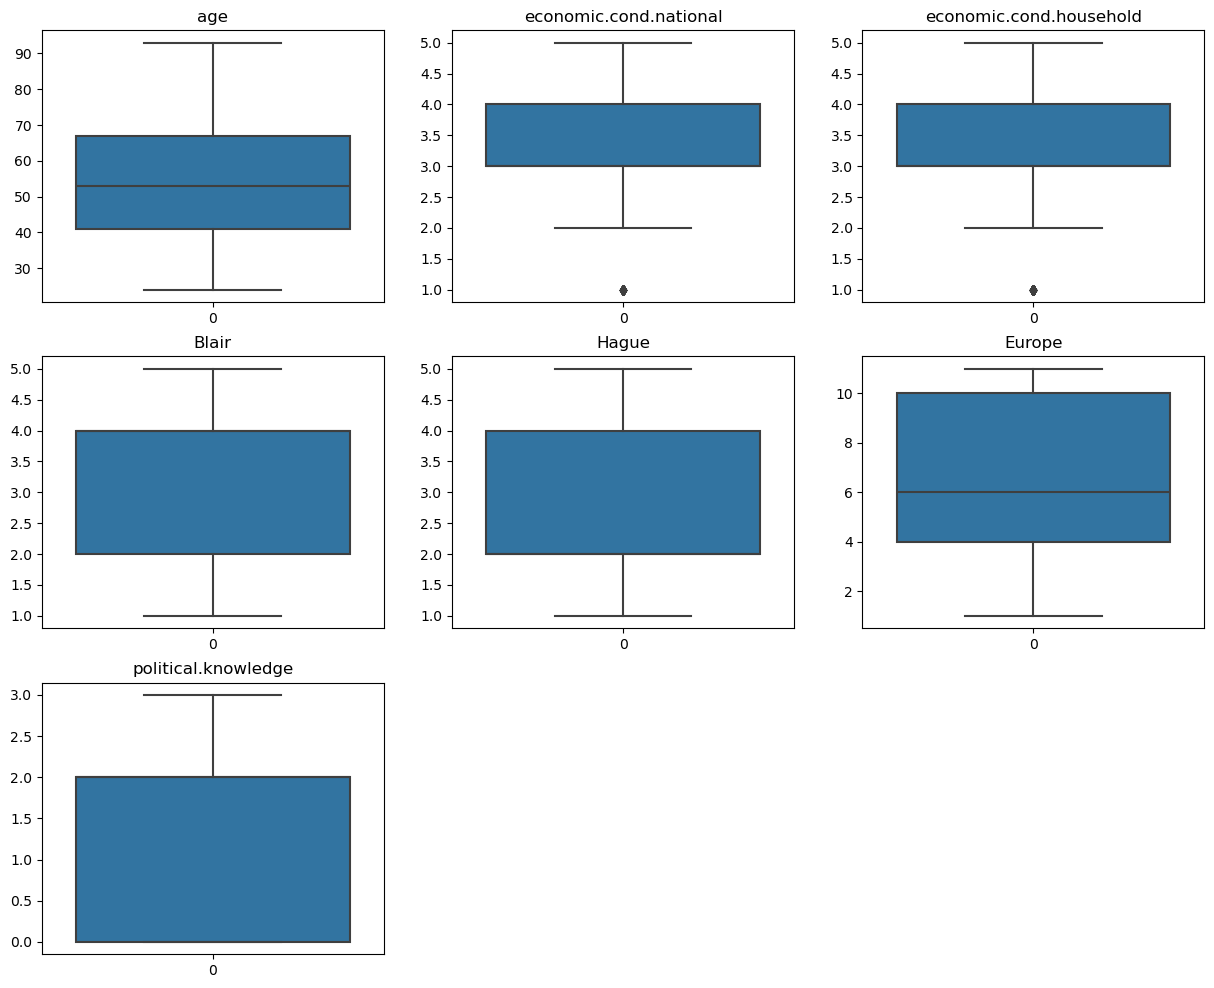

In [48]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[variable])
    plt.title(variable) ## Complete the code to create boxplots for all the numeric columns
plt.show()

#### Data Preparation for modeling

In [49]:
data["vote"] = data["vote"].apply(lambda x: 1 if x == "Labour" else 0)

X = data.drop(columns=['vote']) ##  to drop vote from the data
Y = data["vote"]


X = pd.get_dummies(X)  ##  code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=1, stratify=Y) ## Complete the code to split the data into train and test in the ratio 70:30

In [50]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1061, 9)
Shape of test set :  (456, 9)
Percentage of classes in training set:
vote
1    0.696513
0    0.303487
Name: proportion, dtype: float64
Percentage of classes in test set:
vote
1    0.697368
0    0.302632
Name: proportion, dtype: float64


count    1517.000000
mean        0.696770
std         0.459805
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: vote, dtype: float64


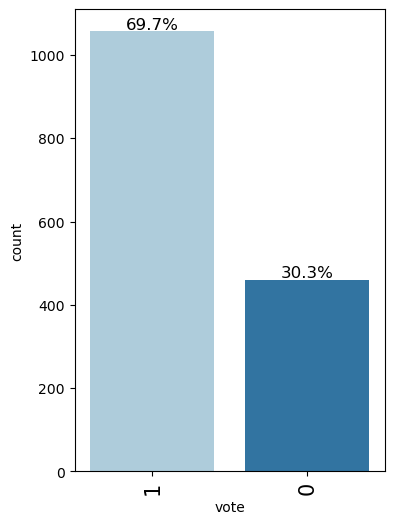

In [51]:
print(data['vote'].describe())
labeled_barplot(data, "vote", perc=True)

In [52]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [53]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Scaling the data

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler()
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
print("X_train_scaled = ",X_train_scaled)
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
print("-"*100)
print("X_test_scaled = ",X_test_scaled)

X_train_scaled =  [[0.68115942 0.5        0.5        ... 0.         1.         0.        ]
 [0.47826087 0.75       1.         ... 0.66666667 1.         0.        ]
 [0.         0.5        0.75       ... 0.         0.         1.        ]
 ...
 [0.46376812 0.75       0.25       ... 0.66666667 1.         0.        ]
 [0.73913043 0.75       0.5        ... 1.         1.         0.        ]
 [0.27536232 0.25       0.5        ... 0.66666667 1.         0.        ]]
----------------------------------------------------------------------------------------------------
X_test_scaled =  [[0.68115942 0.25       0.5        ... 0.         1.         0.        ]
 [0.10144928 0.25       0.25       ... 0.66666667 0.         1.        ]
 [0.15942029 0.75       0.5        ... 0.66666667 0.         1.        ]
 ...
 [0.7826087  0.5        0.5        ... 0.         1.         0.        ]
 [0.15942029 0.5        0.75       ... 0.         0.         1.        ]
 [0.85507246 0.25       0.75       ... 0.66666667 

### Bagging - Model Building and Hyperparameter Tuning


In [55]:
bagging_classifier = BaggingClassifier(random_state=1) ## Cto define bagging classifier with random state = 1
bagging_classifier.fit(X_train,y_train) ## to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Checking model performance on training set


In [56]:
y_train_pred = bagging_classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train Data):\n", confusion_matrix_train) ## Complete the code to create confusion matrix for train data

Confusion Matrix (Train Data):
 [[316   6]
 [ 11 728]]


In [57]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train) 
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.983977,0.985115,0.991826,0.988459


#### Checking model performance on test set

In [58]:
y_test_pred = bagging_classifier.predict(X_test)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)## Complete the code to create confusion matrix for test data

Confusion Matrix (Test Data):
 [[101  37]
 [ 34 284]]


In [59]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.844298,0.893082,0.884735,0.888889


#### Hyperparameter Tuning - Bagging Classifier

In [60]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0], # minimum two hyperparameters to be used for tuning
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5) ## to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_samples=0.5, n_estimators=100, random_state=1)

#### Checking model performance on training set

In [61]:
y_train_pred_tuned = bagging_estimator_tuned.predict(X_train)

# Create confusion matrix for train data using the tuned estimator
confusion_matrix_train_tuned = confusion_matrix(y_train, y_train_pred_tuned)
print("Confusion Matrix (Train Data - Tuned Estimator):\n", confusion_matrix_train_tuned) ## Complete the code to create confusion matrix for train data on tuned estimator

Confusion Matrix (Train Data - Tuned Estimator):
 [[284  38]
 [ 20 719]]


In [62]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) 
## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.945335,0.972936,0.949802,0.96123


#### Checking model performance on test set

In [63]:
y_test_pred_tuned = bagging_estimator_tuned.predict(X_test)

# Create confusion matrix for test data using the tuned estimator
confusion_matrix_test_tuned = confusion_matrix(y_test, y_test_pred_tuned)
print("Confusion Matrix (Test Data - Tuned Estimator):\n", confusion_matrix_test_tuned) ## Complete the code to create confusion matrix for test data on tuned estimator

Confusion Matrix (Test Data - Tuned Estimator):
 [[ 96  42]
 [ 28 290]]


In [64]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.846491,0.91195,0.873494,0.892308


### Random Forest

In [65]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced') ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train,y_train) ## Complete the code to fit random forest on the train data

RandomForestClassifier(class_weight='balanced', random_state=1)

### Checking model performance on training set

In [66]:
y_train_pred_rf = rf_estimator.predict(X_train)
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print("Confusion Matrix (Train Data):\n", confusion_matrix_train_rf) ## Complete the code to create confusion matrix for train data

Confusion Matrix (Train Data):
 [[322   0]
 [  0 739]]


In [67]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking model performance on test set

In [68]:
y_test_pred_rf = rf_estimator.predict(X_test)
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test_rf) 

Confusion Matrix (Test Data):
 [[ 93  45]
 [ 27 291]]


In [69]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.842105,0.915094,0.866071,0.889908


### Hyperparameter Tuning - Random Forest

In [70]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    'n_estimators': [10, 50, 100],  # Example values for tuning
    'max_depth': [None, 10, 20],  # Example values for tuning # minimum two hyperparameters to be used for tuning
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_fores

RandomForestClassifier(max_depth=10, oob_score=True, random_state=1)

#### Checking model performance on training set

In [71]:
y_train_pred_rf_tuned = rf_tuned.predict(X_train)
confusion_matrix_train_rf_tuned = confusion_matrix(y_train, y_train_pred_rf_tuned)
print("Confusion Matrix (Train Data - Tuned Estimator):\n", confusion_matrix_train_rf_tuned) ## Complete the code to create confusion matrix for train data on tuned estimator

Confusion Matrix (Train Data - Tuned Estimator):
 [[302  20]
 [ 16 723]]


In [72]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.96607,0.978349,0.973082,0.975709


#### Checking model performance on test set

In [73]:
y_test_pred_rf_tuned = rf_tuned.predict(X_test)
confusion_matrix_test_rf_tuned = confusion_matrix(y_test, y_test_pred_rf_tuned)
print("Confusion Matrix (Test Data - Tuned Estimator):\n", confusion_matrix_test_rf_tuned) ## Complete the code to create confusion matrix for test data on tuned estimator

Confusion Matrix (Test Data - Tuned Estimator):
 [[ 93  45]
 [ 26 292]]


In [74]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.844298,0.918239,0.866469,0.891603


### Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [75]:
ab_classifier = AdaBoostClassifier(random_state=1) ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train, y_train) ## Complete the code to fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

In [76]:
y_train_pred_ab = ab_classifier.predict(X_train)
confusion_matrix_train_ab = confusion_matrix(y_train, y_train_pred_ab)
print("Confusion Matrix (Train Data):\n", confusion_matrix_train_ab)
 ## Complete the code to create confusion matrix for train data

Confusion Matrix (Train Data):
 [[227  95]
 [ 75 664]]


In [77]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.839774,0.898512,0.874835,0.886515


#### Checking model performance on test set

In [78]:
y_test_pred_ab = ab_classifier.predict(X_test)
confusion_matrix_test_ab = confusion_matrix(y_test, y_test_pred_ab)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test_ab) ## Complete the code to create confusion matrix for test data

Confusion Matrix (Test Data):
 [[ 93  45]
 [ 30 288]]


In [79]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.835526,0.90566,0.864865,0.884793


### Hyperparameter Tuning - AdaBoost Classifier

In [80]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.5, 1.0], # minimum two hyperparameters to be used for tuning
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=1)

#### Checking model performance on training set

In [81]:
y_train_pred_abc_tuned = abc_tuned.predict(X_train)
confusion_matrix_train_abc_tuned = confusion_matrix(y_train, y_train_pred_abc_tuned)
print("Confusion Matrix (Train Data - Tuned Estimator):\n", confusion_matrix_train_abc_tuned) 

Confusion Matrix (Train Data - Tuned Estimator):
 [[212 110]
 [ 67 672]]


In [82]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.833176,0.909337,0.859335,0.883629


#### Checking model performance on test set

In [83]:
y_test_pred_abc_tuned = abc_tuned.predict(X_test)
confusion_matrix_test_abc_tuned = confusion_matrix(y_test, y_test_pred_abc_tuned)
print("Confusion Matrix (Test Data - Tuned Estimator):\n", confusion_matrix_test_abc_tuned)

Confusion Matrix (Test Data - Tuned Estimator):
 [[ 91  47]
 [ 23 295]]


In [84]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.846491,0.927673,0.862573,0.893939


### Model Performance Comparison and Final Model Selection

In [85]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,0.983977,0.945335,1.0,0.966070,0.839774,0.833176
Recall,0.985115,0.972936,1.0,0.978349,0.898512,0.909337
Precision,0.991826,0.949802,1.0,0.973082,0.874835,0.859335
F1,0.988459,0.961230,1.0,0.975709,0.886515,0.883629


In [86]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
]
print("Testing performance comparison:")
models_test_comp_df
## Complete the code to check performance for test data

Testing performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,0.844298,0.846491,0.842105,0.844298,0.835526,0.846491
Recall,0.893082,0.911950,0.915094,0.918239,0.905660,0.927673
Precision,0.884735,0.873494,0.866071,0.866469,0.864865,0.862573
F1,0.888889,0.892308,0.889908,0.891603,0.884793,0.893939


#### Important features of the final model

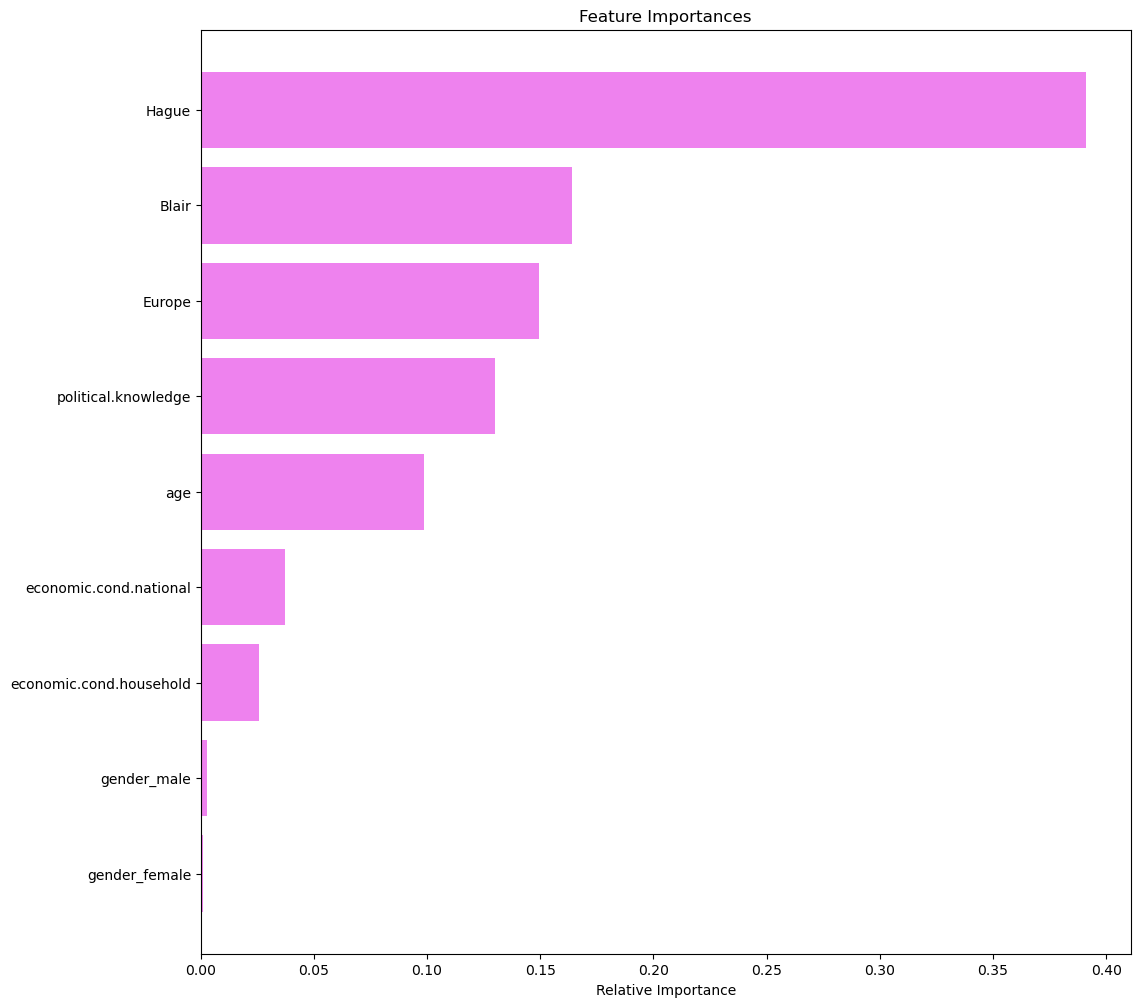

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Actionable Insights and Recommendations

### Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [91]:
knn = knn.fit(X_train,y_train)

In [92]:
pred_label= knn.predict(X_test)
knn.score(X_test,y_test)

0.8026315789473685

In [93]:
print(confusion_matrix(knn.predict(X_train),y_train))

[[223  69]
 [ 99 670]]


In [94]:
print(classification_report(knn.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73       292
           1       0.91      0.87      0.89       769

    accuracy                           0.84      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.85      0.84      0.84      1061



In [95]:
print(classification_report(knn.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.62      0.69      0.66       124
           1       0.88      0.84      0.86       332

    accuracy                           0.80       456
   macro avg       0.75      0.77      0.76       456
weighted avg       0.81      0.80      0.81       456



AUC: 0.915


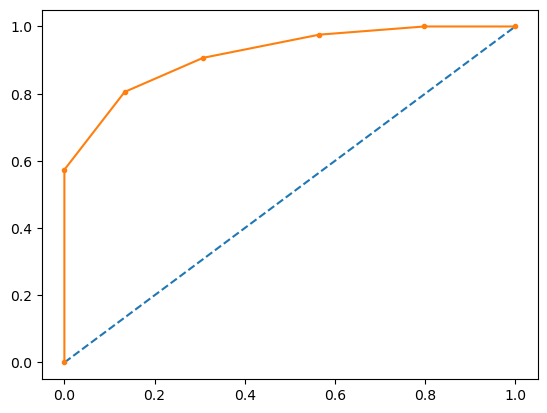

In [96]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.859


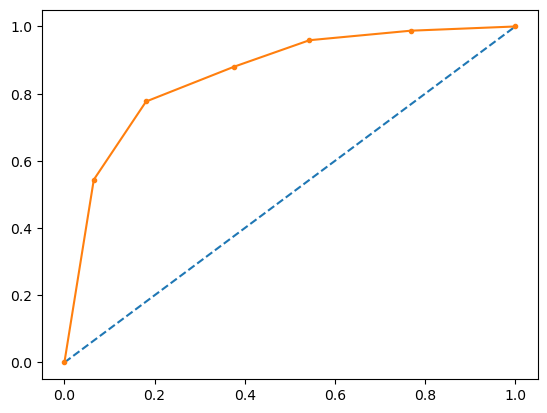

In [97]:
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
nb=GaussianNB()

In [100]:
nb= nb.fit(X_train, y_train)

In [101]:
print(confusion_matrix(nb.predict(X_train),y_train))
print(classification_report(nb.predict(X_train),y_train))

[[226  95]
 [ 96 644]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       321
           1       0.87      0.87      0.87       740

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [102]:
print(confusion_matrix(nb.predict(X_test),y_test))
print(classification_report(nb.predict(X_test),y_test))

[[102  28]
 [ 36 290]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       130
           1       0.91      0.89      0.90       326

    accuracy                           0.86       456
   macro avg       0.83      0.84      0.83       456
weighted avg       0.86      0.86      0.86       456



AUC: 0.873


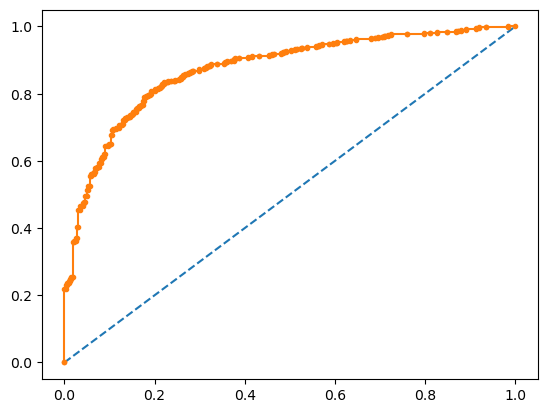

In [103]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.913


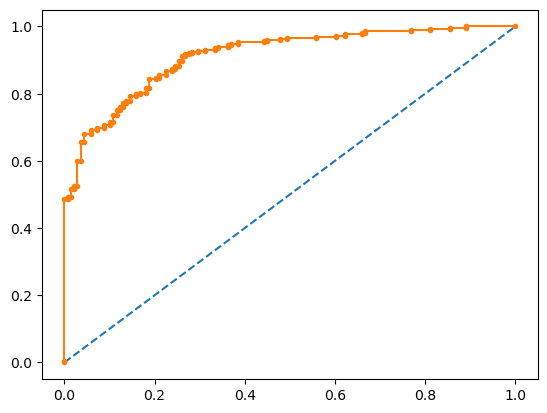

In [104]:
# AUC and ROC for the testing data
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [107]:
DT_model= DecisionTreeClassifier()

In [108]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [109]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [110]:
DT_model=grid_search.best_estimator_

In [111]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=30,
                       random_state=0)

In [130]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print("Train = ",model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

Train =  0.8133836003770029
[[186 136]
 [ 62 677]]
              precision    recall  f1-score   support

           0       0.75      0.58      0.65       322
           1       0.83      0.92      0.87       739

    accuracy                           0.81      1061
   macro avg       0.79      0.75      0.76      1061
weighted avg       0.81      0.81      0.81      1061



In [113]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print("Test = ",model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

Test =  0.8245614035087719
[[ 79  59]
 [ 21 297]]
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       138
           1       0.83      0.93      0.88       318

    accuracy                           0.82       456
   macro avg       0.81      0.75      0.77       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.876


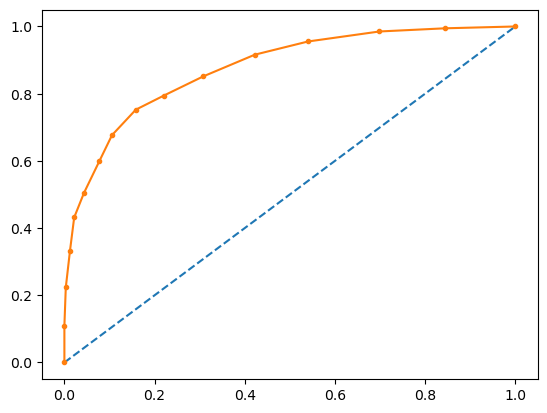

In [114]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.897


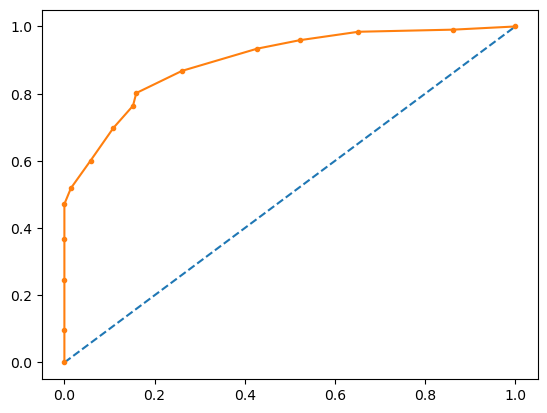

In [115]:
# AUC and ROC for the testing data

# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

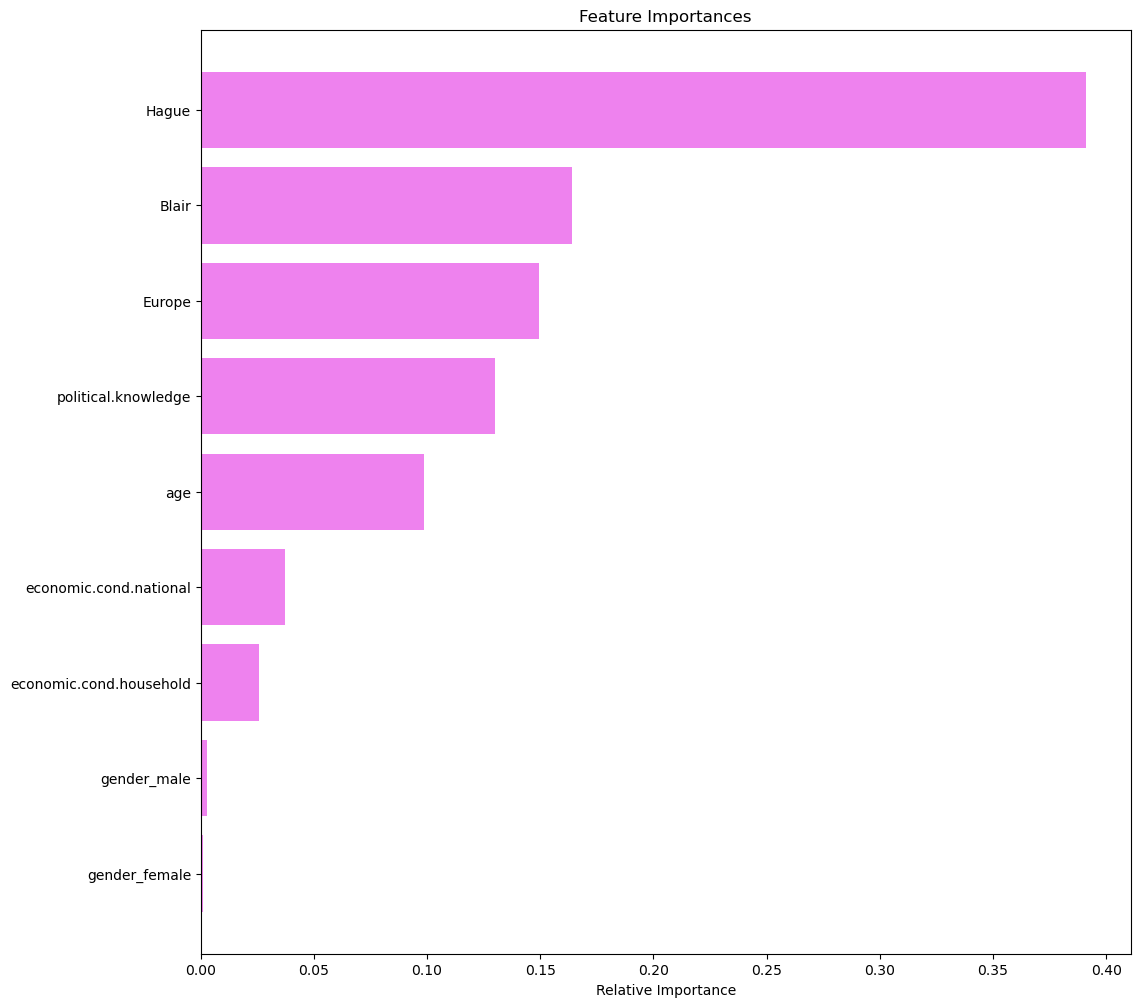

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Gradient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [118]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print("Train = ",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Train =  0.885956644674835
[[250  72]
 [ 49 690]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [119]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print("Test = ",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Test =  0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



### KNN Model

In [120]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

### Checking model performance on training set

In [125]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Train = ",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Train =  0.8416588124410933
[[223  99]
 [ 69 670]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



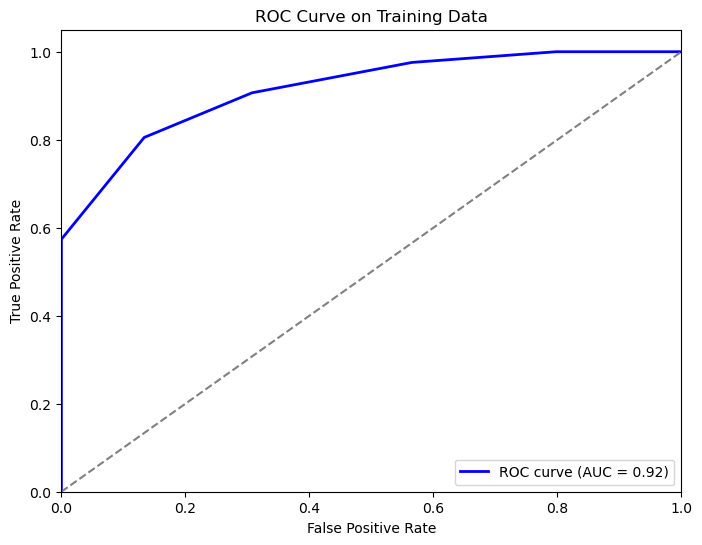

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 1) on the training data
train_probs = KNN_model.predict_proba(X_train)[:, 1]

# Compute ROC curve and AUC for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for the training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Training Data')
plt.legend(loc='lower right')
plt.show()


In [126]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("Test = ",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Test =  0.8026315789473685
[[ 86  52]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       138
           1       0.84      0.88      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456



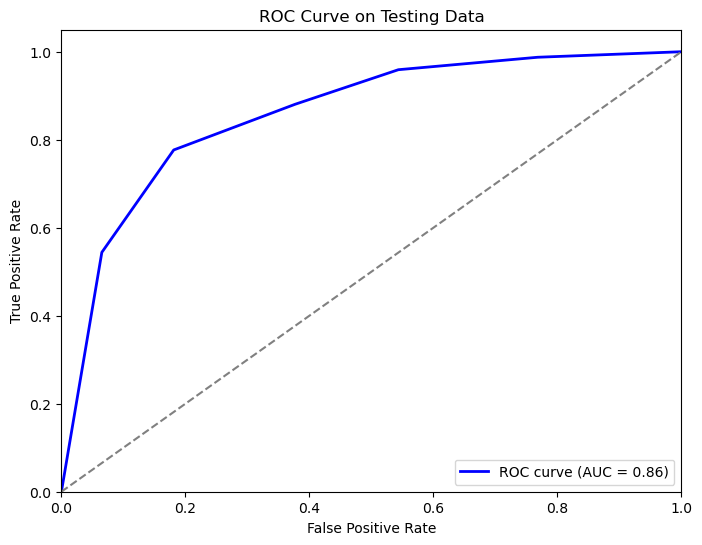

In [129]:
# Predict probabilities for the positive class (class 1) on the training data
test_probs = KNN_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the training data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for the testing data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Testing Data')
plt.legend(loc='lower right')
plt.show()


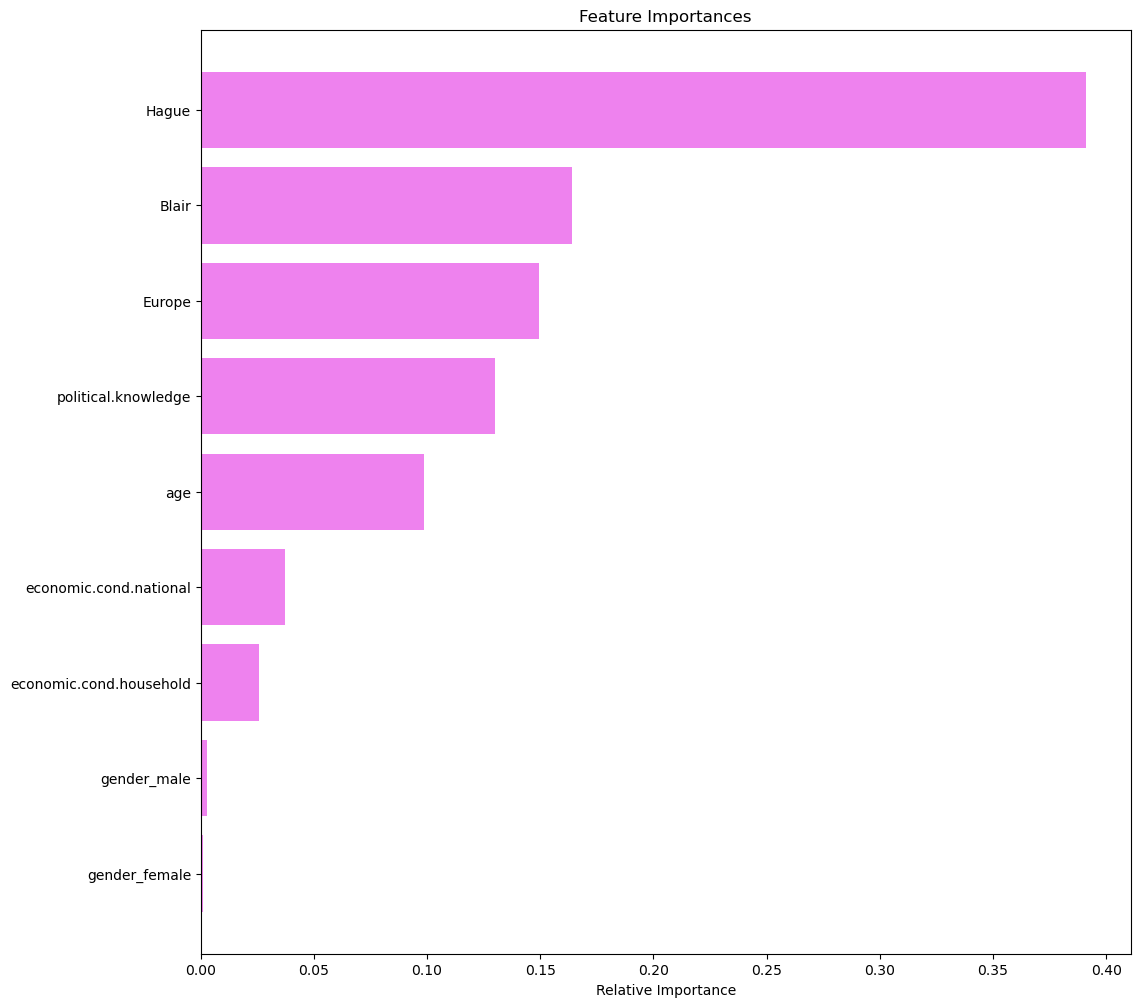

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing the AUC, ROC curve on the train data of all the tuned models:

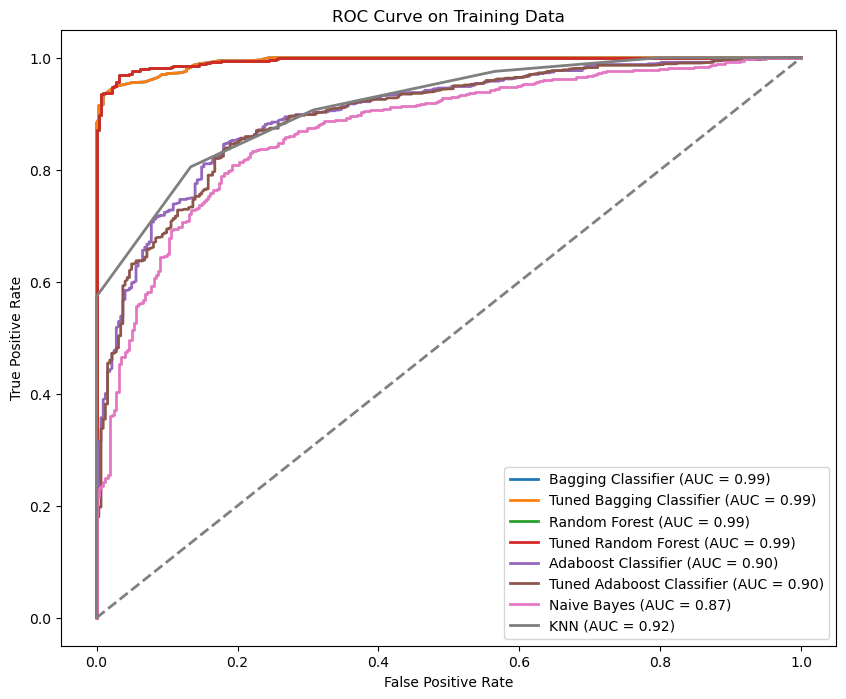

AUC for Bagging Classifier: 0.9934526260936803
AUC for Tuned Bagging Classifier: 0.9934526260936803
AUC for Random Forest: 0.9947217576210928
AUC for Tuned Random Forest: 0.9947217576210928
AUC for Adaboost Classifier: 0.9000033619378209
AUC for Tuned Adaboost Classifier: 0.896011060775431
AUC for Naive Bayes: 0.8725783541633397
AUC for KNN: 0.9154556686474083


In [136]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define tuned_models dictionary with your tuned models
tuned_models = {
    'Bagging Classifier': bagging_estimator_tuned,
    'Tuned Bagging Classifier': bagging_estimator_tuned,
    'Random Forest': rf_tuned,
    'Tuned Random Forest': rf_tuned,
    'Adaboost Classifier': ab_classifier,
    'Tuned Adaboost Classifier': abc_tuned,
    'Naive Bayes': nb,
    'KNN': knn,
    # Add other tuned models as necessary
}

# Initialize a dictionary to store AUC values for each model
auc_values = {}

# Initialize a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate over tuned models
for model_name, model in tuned_models.items():  
    # Predict probabilities on the training data
    probs = model.predict_proba(X_train)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_train, probs)
    roc_auc = auc(fpr, tpr)
    
    # Store AUC value
    auc_values[model_name] = roc_auc
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

# Plot the random classifier line (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Training Data')
plt.legend(loc="lower right")

# Show plot
plt.show()

# Print AUC values
for model_name, auc_value in auc_values.items():
    print(f"AUC for {model_name}: {auc_value}")


### Comparing the AUC, ROC curve on the test data of all the tuned models:

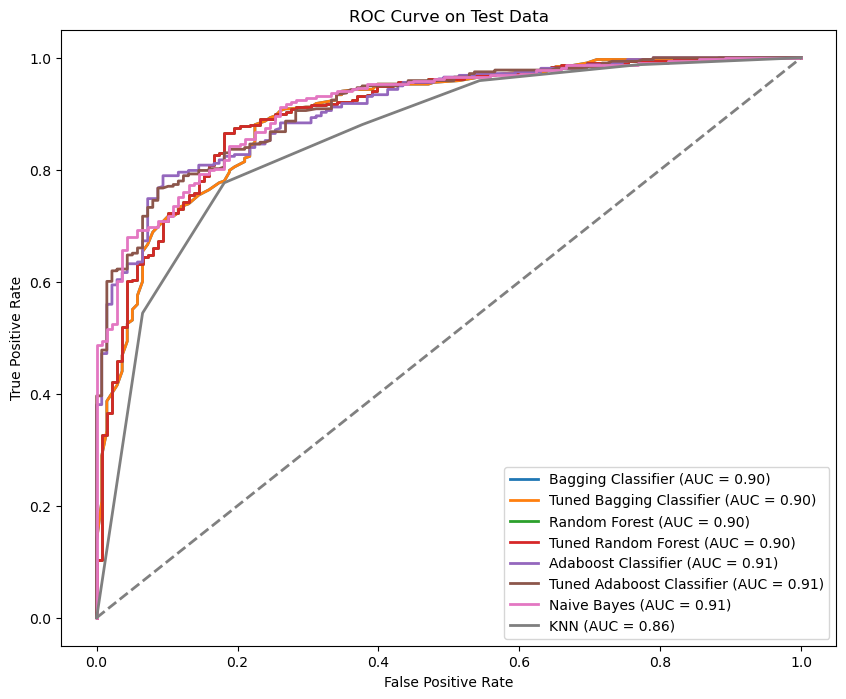

AUC for Bagging Classifier on Test Data: 0.8987330234253942
AUC for Tuned Bagging Classifier on Test Data: 0.8987330234253942
AUC for Random Forest on Test Data: 0.9024701485735119
AUC for Tuned Random Forest on Test Data: 0.9024701485735119
AUC for Adaboost Classifier on Test Data: 0.9104571142101906
AUC for Tuned Adaboost Classifier on Test Data: 0.9139891532221311
AUC for Naive Bayes on Test Data: 0.9128156047762283
AUC for KNN on Test Data: 0.8587868015677697


In [137]:
# Initialize a dictionary to store test AUC values for each model
test_auc_values = {}

# Initialize a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate over tuned models
for model_name, model in tuned_models.items():  
    # Predict probabilities on the test data
    probs = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC for test data
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    test_roc_auc = auc(fpr, tpr)
    
    # Store test AUC value
    test_auc_values[model_name] = test_roc_auc
    
    # Plot ROC curve for test data
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name, test_roc_auc))

# Plot the random classifier line (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Data')
plt.legend(loc="lower right")

# Show plot
plt.show()

# Print test AUC values
for model_name, test_auc_value in test_auc_values.items():
    print(f"AUC for {model_name} on Test Data: {test_auc_value}")


## Problem 2

### Problem Statement

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

### Import Libraries

In [174]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [141]:
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [175]:
# Download inaugural corpus
nltk.download('inaugural')

# Define the fileids for the speeches
fileids = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

# Extract the speeches
speeches = [inaugural.raw(fileid) for fileid in fileids]

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [142]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [143]:
len(inaugural.fileids())

59

#### There are 59 speeches of presidents in the corpus, we need only the 3 speeches of President Roosevelt in 1941, President JFK in 1961, President Nixon in 1973.

#### We take a look at Franklin Roosevelt's speech to get an overview of the symbols, punctuations used.

In [144]:
tweets=pd.read_excel('/Users/ishashukla/Downloads/Project_Speech.xlsx')

In [145]:
data = tweets.copy()

### Overview Of Data Set

In [147]:
data.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [150]:
data.shape

(3, 2)

In [151]:
data = pd.DataFrame()

In [152]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [153]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [173]:
file_names = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

In [155]:
years = [1941, 1961, 1973]

In [156]:
names = ['Franklin D. Roosevelt', 'John F. Kennedy', 'Richard Nixon']

In [157]:
speeches = []
for i in file_names:
  speeches.append(inaugural.raw(i))

#### Number Of Characters

In [158]:
for i in range(0, len(file_names)):
  print("The No. of characters in President", names[i] + "'s speech in", years[i], "is", len(speeches[i]))

The No. of characters in President Franklin D. Roosevelt's speech in 1941 is 7571
The No. of characters in President John F. Kennedy's speech in 1961 is 7618
The No. of characters in President Richard Nixon's speech in 1973 is 9991


### Number Of Words

In [163]:
for i in range(0, len(file_names)):
    print("The number of words in President", names[i] + "'s speech in", years[i], "is", len(inaugural.words(file_names[i])))


The number of words in President Franklin D. Roosevelt's speech in 1941 is 1536
The number of words in President John F. Kennedy's speech in 1961 is 1546
The number of words in President Richard Nixon's speech in 1973 is 2028


In [165]:
for i in range(0, len(file_names)):
  print("The No. of sentences in President", names[i] + "'s speech in", years[i], "is", len(inaugural.sents(file_names[i])))

The No. of sentences in President Franklin D. Roosevelt's speech in 1941 is 68
The No. of sentences in President John F. Kennedy's speech in 1961 is 52
The No. of sentences in President Richard Nixon's speech in 1973 is 69


### Remove All Stopwords from all three speeches(Text Pre-Processing)

In [166]:
df = pd.DataFrame(speeches, index = names, columns = ['Speech'])
df

,Speech
Franklin D. Roosevelt,On each national day of inauguration since 178...
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


### Lower Case Conversion

In [167]:
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df

,Speech
Franklin D. Roosevelt,on each national day of inauguration since 178...
John F. Kennedy,"vice president johnson, mr. speaker, mr. chief..."
Richard Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


In [168]:
#Special Characters and Punctuation Removals
df['Speech'] = df['Speech'].str.replace('[^\w\s]', '') #removes everything except words(letters, numbers, underscore) & spaces
df

,Speech
Franklin D. Roosevelt,on each national day of inauguration since 178...
John F. Kennedy,"vice president johnson, mr. speaker, mr. chief..."
Richard Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


In [169]:
#Stopwords and Punctuation Removal
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords.extend(['mr', 'mrs', 'let', 'us'])
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x for x in x.split() if x not in stopwords))
df

,Speech
Franklin D. Roosevelt,"national day inauguration since 1789, people r..."
John F. Kennedy,"vice president johnson, mr. speaker, mr. chief..."
Richard Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


In [170]:
# a snippet of Roosevelt's speech post stopword removal
df.iloc[0][0]

'national day inauguration since 1789, people renewed sense dedication united states. washington\'s day task people create weld together nation. lincoln\'s day task people preserve nation disruption within. day task people save nation institutions disruption without. come time, midst swift happenings, pause moment take stock -- recall place history been, rediscover may be. not, risk real peril inaction. lives nations determined count years, lifetime human spirit. life man three-score years ten: little more, little less. life nation fullness measure live. men doubt this. men believe democracy, form government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future -- freedom ebbing tide. americans know true. eight years ago, life republic seemed frozen fatalistic terror, proved true. midst shock -- acted. acted quickly, boldly, decisively. later years living years -- fruitful years people democracy. brought greater 

In [171]:
#character and word count post stop removal
df['char_count'] = df['Speech'].str.len()
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split()))
df

,Speech,char_count,word_count
Franklin D. Roosevelt,"national day inauguration since 1789, people r...",4877,657
John F. Kennedy,"vice president johnson, mr. speaker, mr. chief...",4960,703
Richard Nixon,"mr. vice president, mr. speaker, mr. chief jus...",6103,814


In [180]:
#Words which occurs most number of times in inaugurals in each President's Speech
for i in range(0, len(df.index)):
  print("The top 3 words with their count in President", names[i] + "'s speech are:", nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3), '\n')

The top 3 words with their count in President Franklin D. Roosevelt's speech are: [('--', 22), ('know', 9), ('life', 6)] 

The top 3 words with their count in President John F. Kennedy's speech are: [('--', 24), ('new', 7), ('pledge', 7)] 

The top 3 words with their count in President Richard Nixon's speech are: [('--', 17), ('new', 15), ('peace', 11)] 



### Problem 2 - Define the problem and Perform Exploratory Data Analysis

In [176]:

for i, speech in enumerate(speeches):
    print(f"Speech of President {fileids[i].split('-')[1].split('.')[0]}:")
    # Number of characters
    num_characters = len(speech)
    print(f"Number of Characters: {num_characters}")

    # Tokenize text into words
    words = word_tokenize(speech)
    # Number of words
    num_words = len(words)
    print(f"Number of Words: {num_words}")

    # Tokenize text into sentences
    sentences = sent_tokenize(speech)
    # Number of sentences
    num_sentences = len(sentences)
    print(f"Number of Sentences: {num_sentences}\n")

Speech of President Roosevelt:
Number of Characters: 7571
Number of Words: 1526
Number of Sentences: 68

Speech of President Kennedy:
Number of Characters: 7618
Number of Words: 1543
Number of Sentences: 52

Speech of President Nixon:
Number of Characters: 9991
Number of Words: 2006
Number of Sentences: 68



In [185]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download inaugural corpus
nltk.download('inaugural')
nltk.download('stopwords')

# Define the fileids for the speeches
fileids = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

# Extract the speeches
speeches = [inaugural.raw(fileid) for fileid in fileids]

# Problem 2 - Text cleaning
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Remove stopwords, special characters, perform stemming and find the 3 most common words
for i, speech in enumerate(speeches):
    print(f"Speech of President {fileids[i].split('-')[1].split('.')[0]}:")
    words = word_tokenize(speech)
    # Remove special characters and stop words, and perform stemming
    words = [ps.stem(word) for word in words if word.isalnum() and word.lower() not in stop_words]
    # Calculate frequency distribution of words
    fdist = FreqDist(words)
    # Get the 3 most common words
    most_common_words = fdist.most_common(10)
    print("Top 10 most common words:")
    for word, frequency in most_common_words:
        print(f"{word}: {frequency}")
    print()


Speech of President Roosevelt:
Top 10 most common words:
nation: 17
know: 10
peopl: 9
spirit: 9
life: 9
democraci: 9
us: 8
america: 8
live: 7
year: 7

Speech of President Kennedy:
Top 10 most common words:
let: 16
us: 12
power: 9
world: 8
nation: 8
side: 8
new: 7
pledg: 7
ask: 6
citizen: 5

Speech of President Nixon:
Top 10 most common words:
us: 26
let: 22
america: 21
peac: 19
world: 18
respons: 17
new: 15
nation: 15
govern: 10
great: 9



[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishashukla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#### Problem 2 - Text cleaning

In [190]:
# Problem 2 - Text cleaning
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Remove stopwords, perform stemming and find the 3 most common words
all_words = []
for speech in speeches:
    words = word_tokenize(speech)
    words = [ps.stem(word) for word in words if word.isalnum() and word.lower() not in stop_words]
    all_words.extend(words)

fdist = FreqDist(all_words)
print("Top 3 most common words used in all three speeches:")
for word, frequency in fdist.most_common(3):
    print(f"{word}: {frequency}")


Top 3 most common words used in all three speeches:
us: 46
nation: 40
let: 39


#### Problem 2 - Plot Word cloud of all three speeches

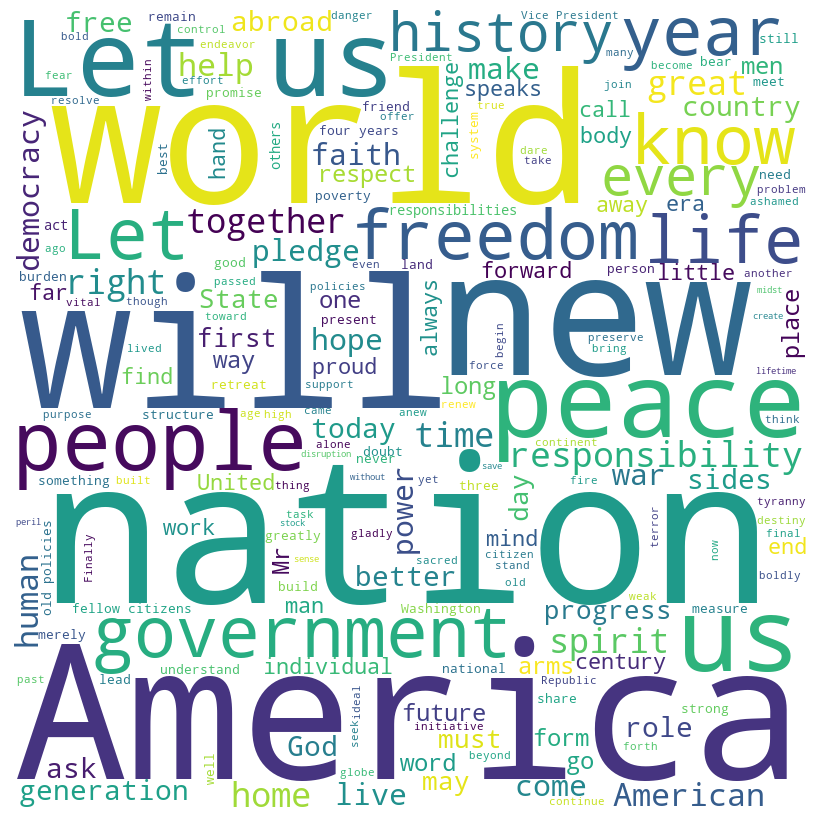

In [186]:

text = ' '.join(speeches)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Speech of President Roosevelt:


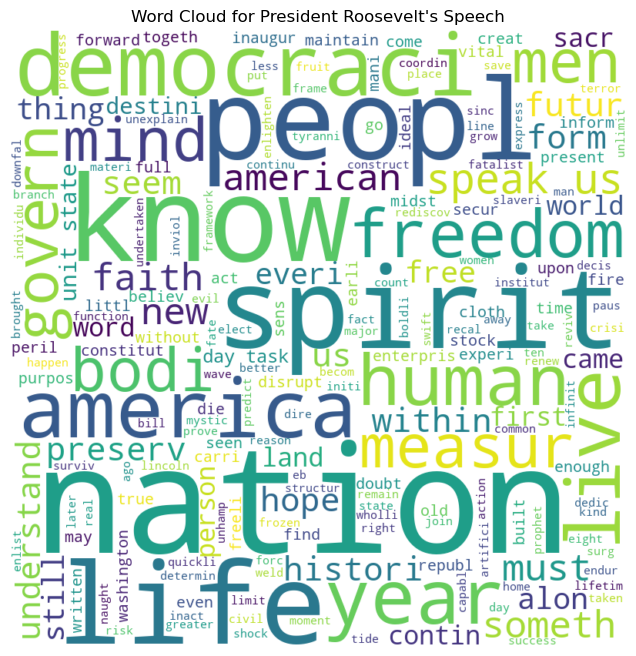

Speech of President Kennedy:


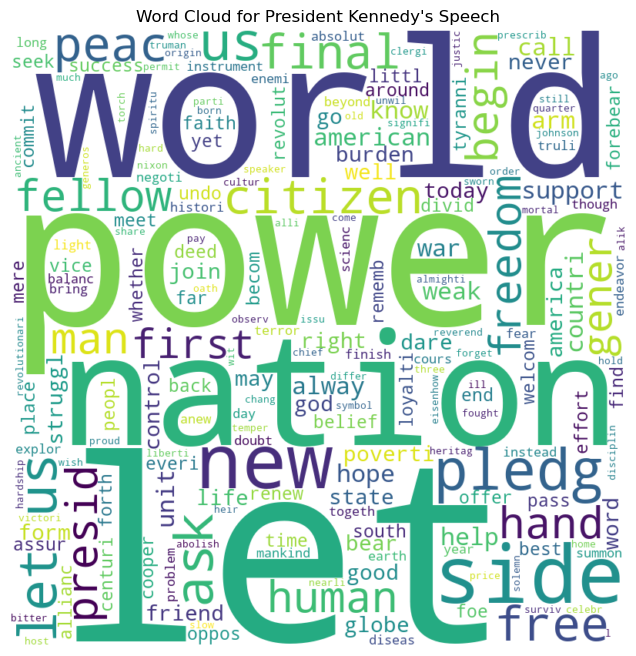

Speech of President Nixon:


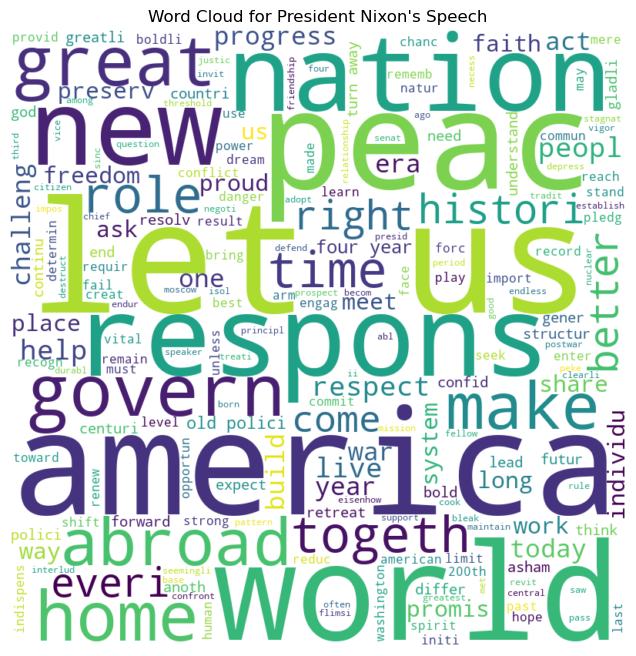

In [191]:
# Generate word cloud for each speech
for i, speech in enumerate(speeches):
    print(f"Speech of President {fileids[i].split('-')[1].split('.')[0]}:")
    words = word_tokenize(speech)
    # Remove stopwords, special characters, and perform stemming
    words = [ps.stem(word) for word in words if word.isalnum() and word.lower() not in stop_words]
    # Join the words back into a single string
    cleaned_text = ' '.join(words)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cleaned_text)
    # Plot the word cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for President {fileids[i].split('-')[1].split('.')[0]}'s Speech")
    plt.axis('off')
    plt.show()